In [21]:
import numpy as np
import pandas as pd
import math
import cv2
import heapq
import os, glob
import matplotlib.pyplot as plt

def BrightnessDivision(area_list):
    bright = ''
    hist_area = 0
    total_image_hist = []
    center_hist = 0.0
    for idx, area in enumerate(area_list) :
        #print(f'area number = {idx}')
        
        dim1 = np.array(area).flatten()

        bins_list = [0, 40, 80, 120, 200, 240]
        hist, bins = np.histogram(dim1, bins_list)

        temp = hist.argsort()
        ranks = np.empty_like(temp)
        ranks[temp] = np.arange(len(hist))

        dictionary = {}
        for i in range(0, len(hist)) :
            dictionary[ranks[i]] = hist[i]

        rank1, rank2, rank3, rank4, rank5 = heapq.nlargest(5, ranks)
        
        #hist_mean = round((dictionary[rank1] + dictionary[rank2] + dictionary[rank3] + dictionary[rank4] + dictionary[rank5]) / 5,1)
        
        if dictionary[rank1] == hist[0] :
            bright = 'off'
            hist_area = 0
        elif dictionary[rank1] == hist[1] :
            bright = 'on'
            hist_area = 1
        elif dictionary[rank1] == hist[2] :
            bright = 'on'
            hist_area = 2
        elif dictionary[rank1] == hist[3] :
            bright = 'on'
        elif dictionary[rank1] == hist[4] :
            bright = 'on'
        
        #print(f'hist_mean = {hist[2]}')
        
        if idx == 4 :
            #print('center point !!')
            center_hist = hist[2]
            total_image_hist.append(bright)
        else :
            total_image_hist.append(bright)
            
#         print(f'rank1 = {dictionary[rank1]}')
#         print(f'rank2 = {dictionary[rank2]}')
#         print(f'rank3 = {dictionary[rank3]}')
#         print(f'rank4 = {dictionary[rank4]}')
#         print(f'rank5 = {dictionary[rank5]}')

#         print("-----------------------------------")
        
        
        fig = plt.figure(figsize=(10, 7)) 
        plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
        plt.title("GRAY")
        dim1 = np.array(area).flatten()
        hist_dataframe = pd.DataFrame(dim1)

        bins_list = [0, 40, 80, 120, 200, 240]
        hist_gray  = cv2.calcHist([area], [0], None, [256], [0,256])

        plt.hist(hist_dataframe.values, bins = bins_list)
        plt.xticks(bins_list)
        
        plt.show()
        
    #total_image_hist.remove(max(total_image_hist))
    #total_image_hist.remove(min(total_image_hist))
    
    #total_image_mean = np.mean(total_image_hist)
    
    #print(f'total_image_hist = {total_image_hist}')
    #print(f'total_image_mean = {total_image_mean}')
    #print(f'center_area = {center_hist}')
    
    off_count = total_image_hist.count('off')
    on_count = total_image_hist.count('on')
    
    if off_count > on_count :
        print("어두운 이미지")
    else :
        if off_count >=2 :
            print("어두운 이미지")
        else :
            print("밝은 이미지")


In [22]:
data_dir = './data/test1'
FileList = glob.glob(data_dir + '/*.jpg')
img_namess = FileList

In [23]:
def devide_area(img):
    h,w,c = img.shape
    
    dst0 = img[0 : int(w/3) , 0 : int(h/3)].copy()
    dst1 = img[0 : int(w/3) , int(h/3) : int(2*h/3)].copy()
    dst2 = img[0 : int(w/3) , int(2*h/3) : h].copy()
    dst3 = img[int(w/3) : int(2*w/3) , 0 : int(h/3)].copy()
    dst4 = img[int(w/3) : int(2*w/3) , int(h/3) : int(2*h/3)].copy()
    dst5 = img[int(w/3) : int(2*w/3) , int(2*h/3) : h].copy()
    dst6 = img[int(2*w/3) : w , 0 : int(h/3)].copy()
    dst7 = img[int(2*w/3) : w , int(h/3) : int(2*h/3)].copy()
    dst8 = img[int(2*w/3) : w , int(2*h/3) : h].copy()
    
    area_list = []
    
    area_list.append(cv2.cvtColor(dst0, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst1, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst2, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst3, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst4, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst5, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst6, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst7, cv2.COLOR_BGR2GRAY))
    area_list.append(cv2.cvtColor(dst8, cv2.COLOR_BGR2GRAY))
    
    return area_list


0 ./data/test1\FA0002_GW01_H01_0001_20211101102050_farm_image_real_814606414aef.jpg


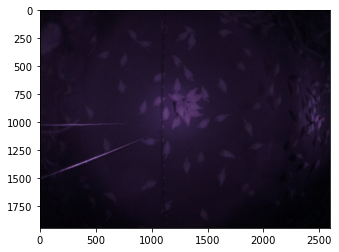

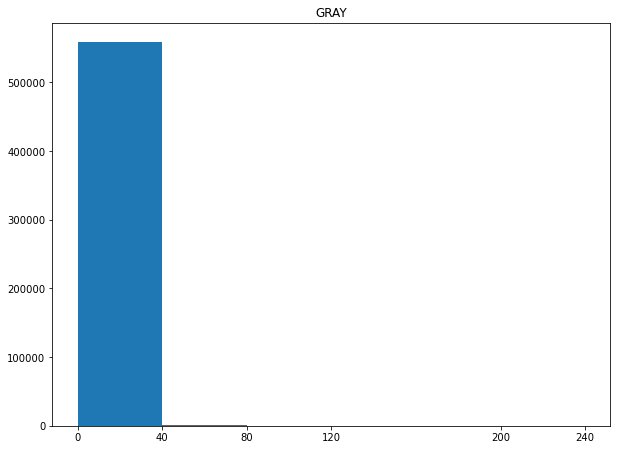

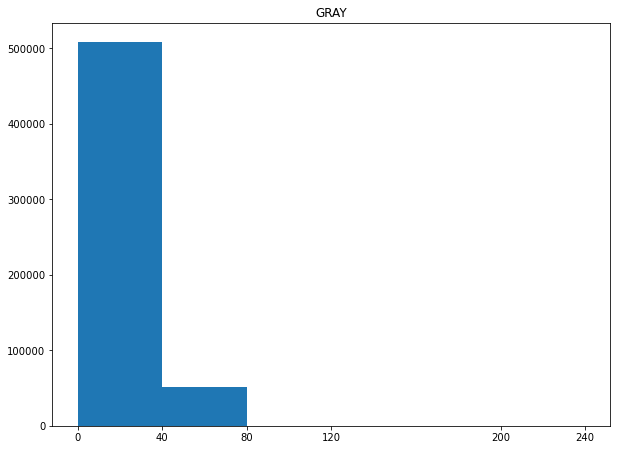

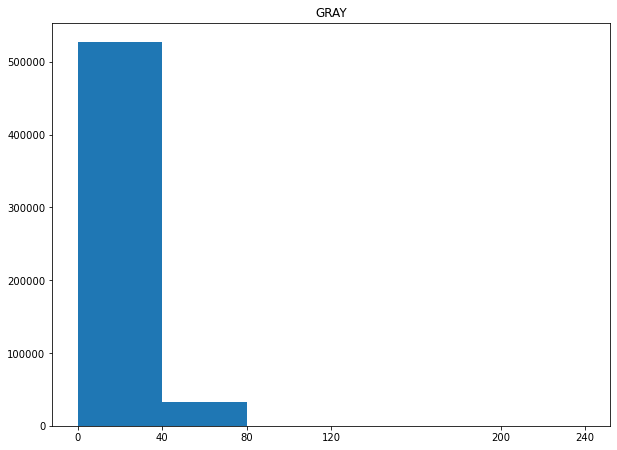

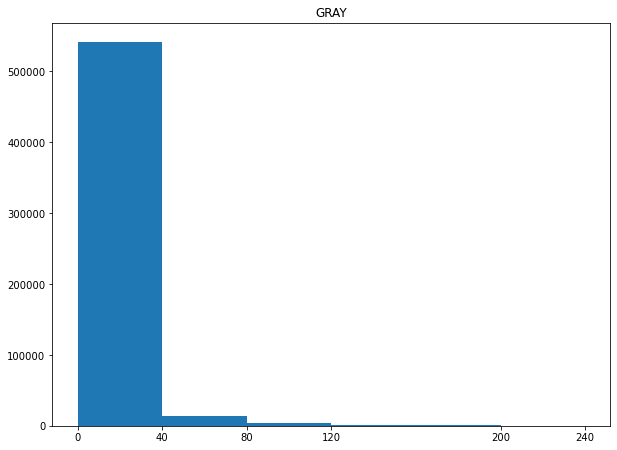

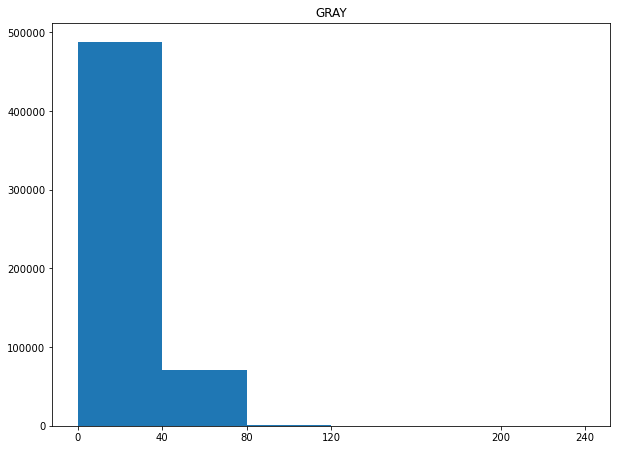

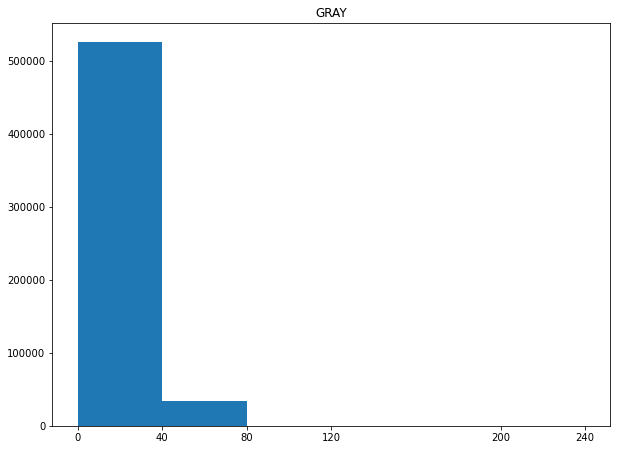

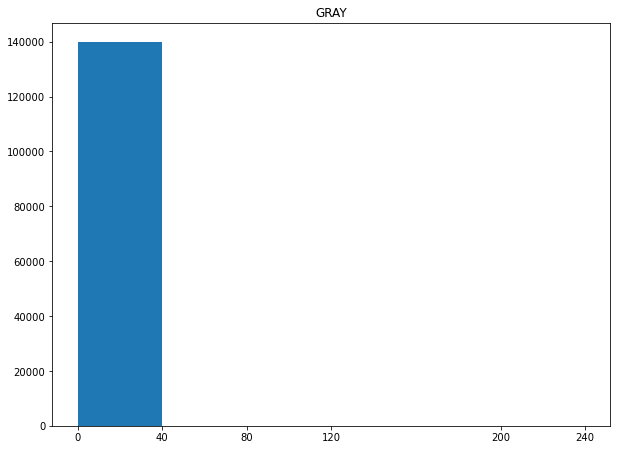

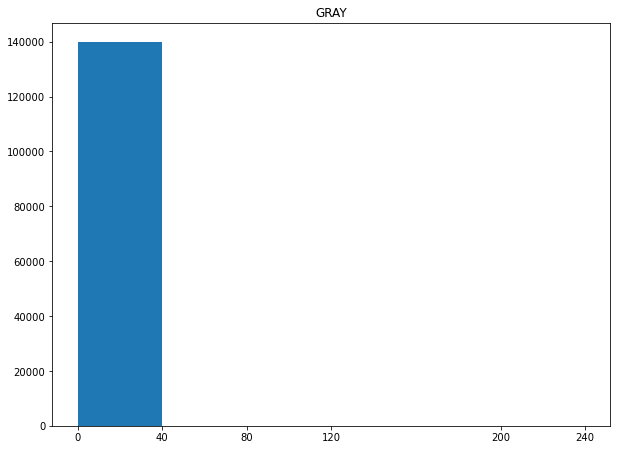

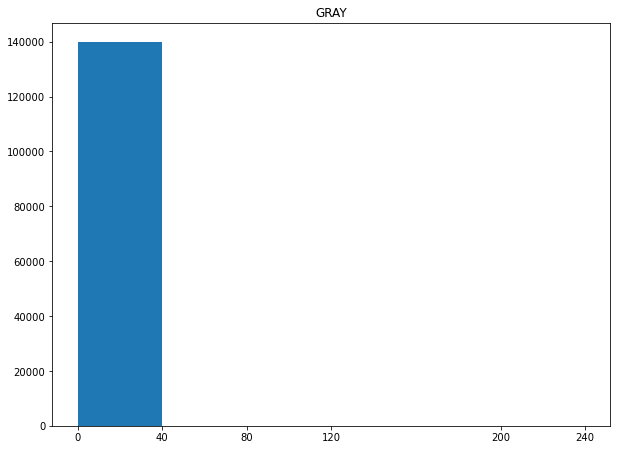

어두운 이미지
1 ./data/test1\FA0002_GW01_H01_0001_20211102095612_farm_image_real_e7a6c6b0492b.jpg


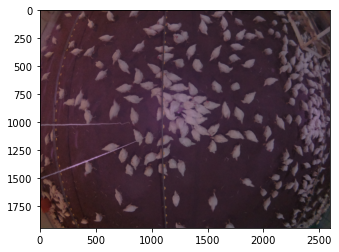

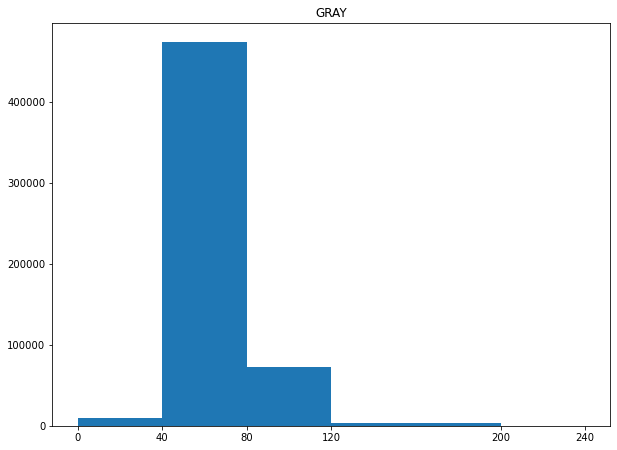

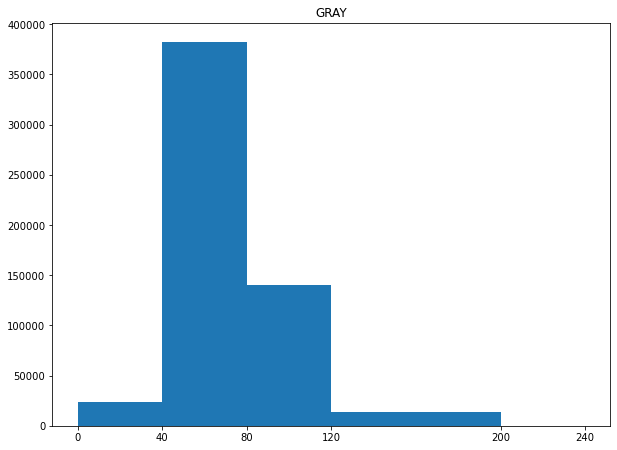

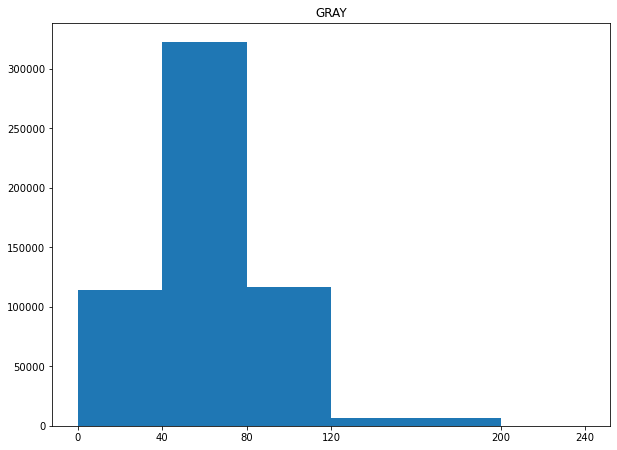

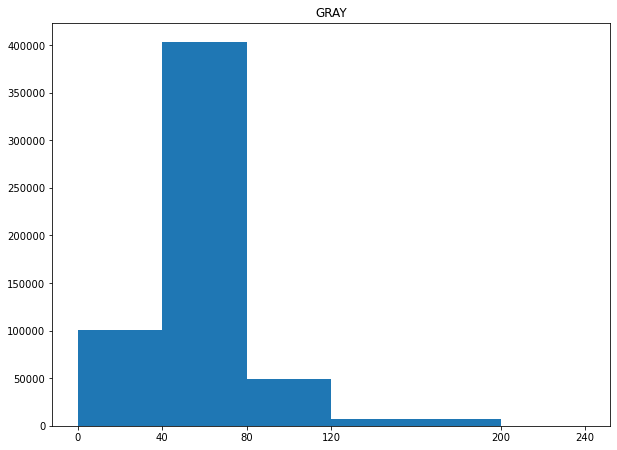

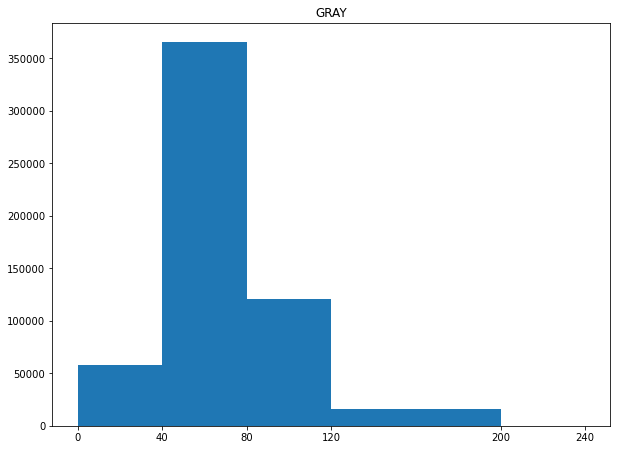

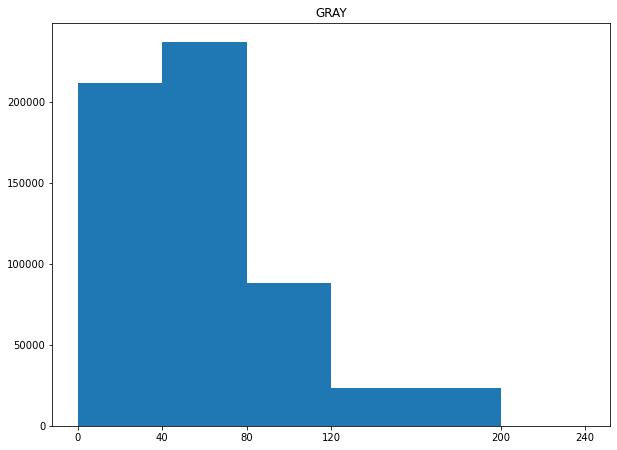

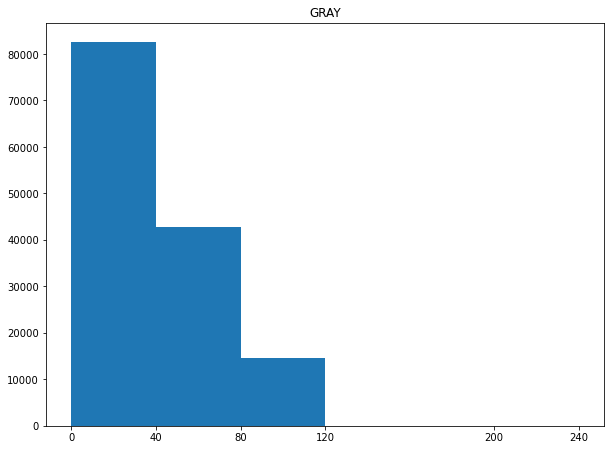

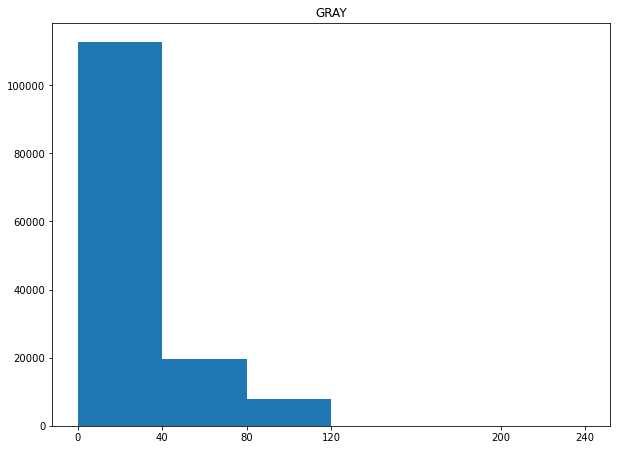

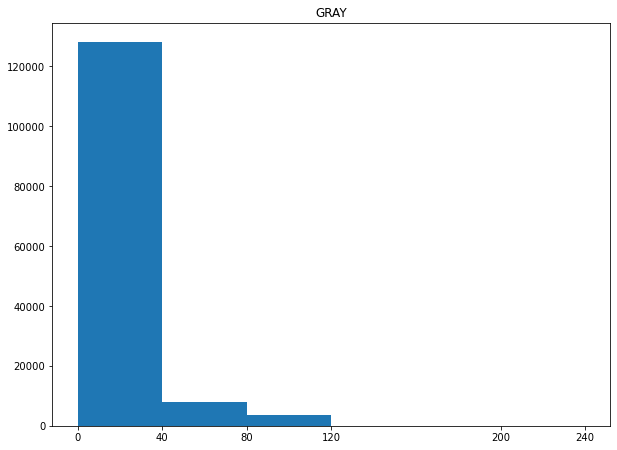

어두운 이미지
2 ./data/test1\FA0002_GW01_H01_0001_20211102125805_farm_image_real_05705fa54aee.jpg


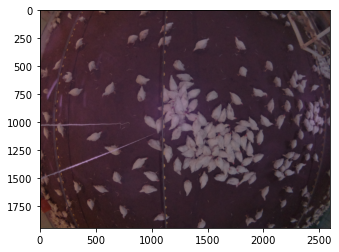

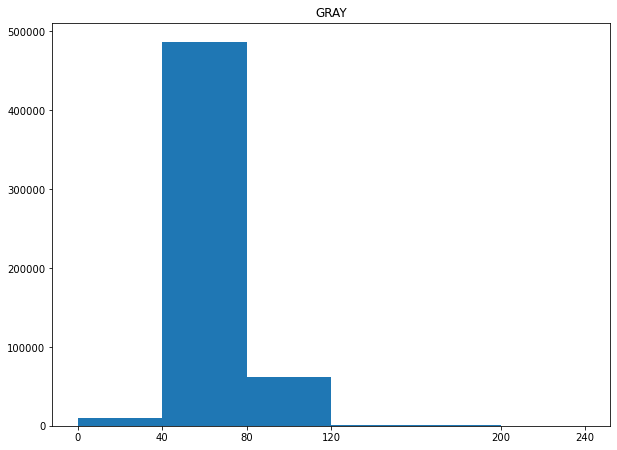

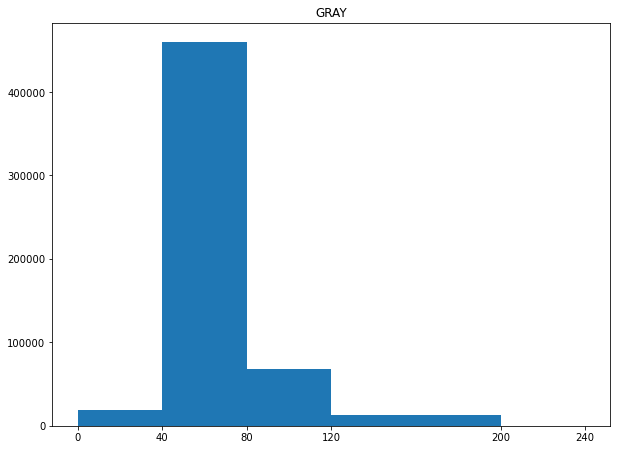

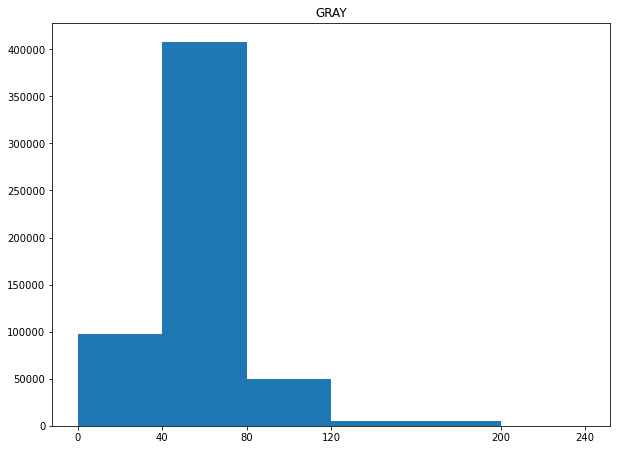

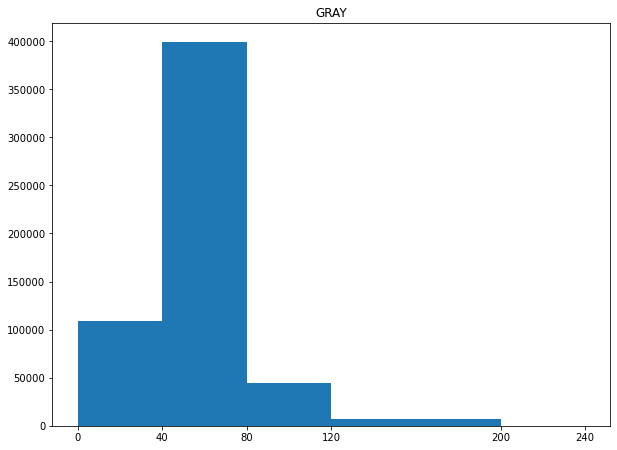

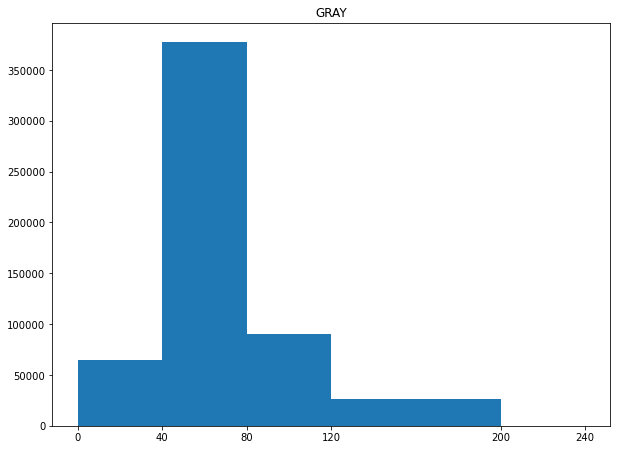

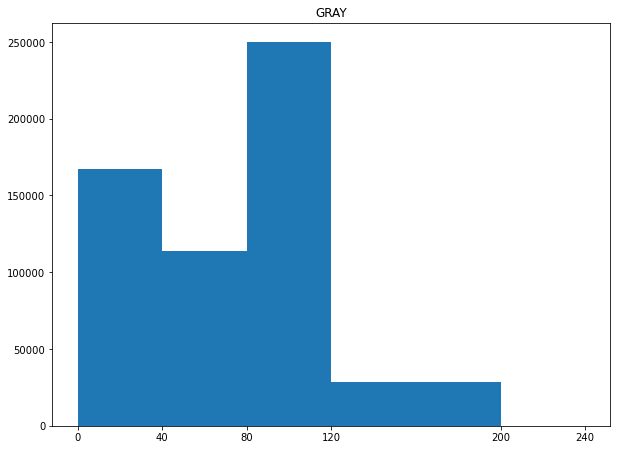

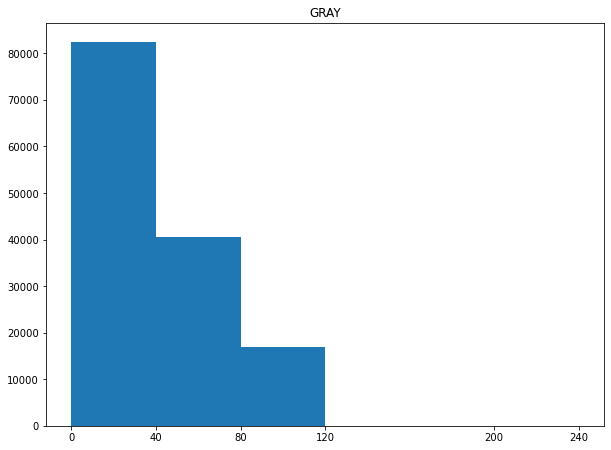

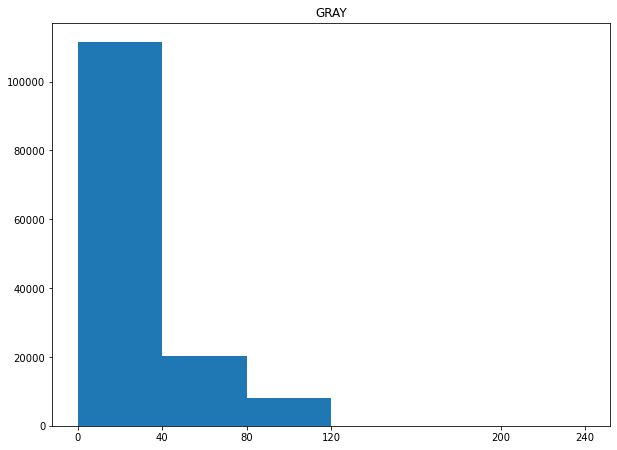

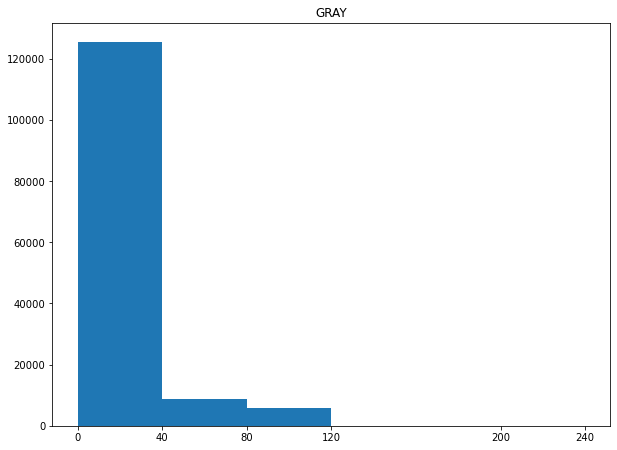

어두운 이미지
3 ./data/test1\FA0002_GW01_H01_0001_20211102135836_farm_image_real_a8af326d459a.jpg


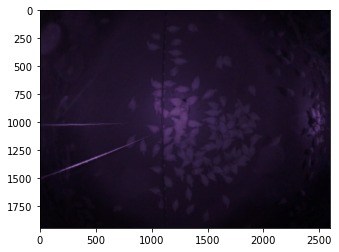

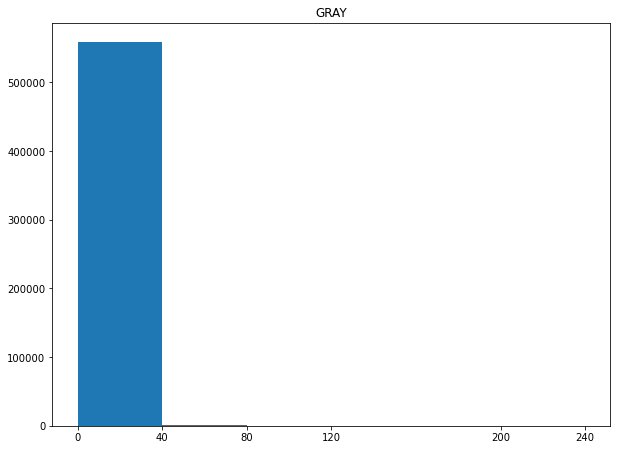

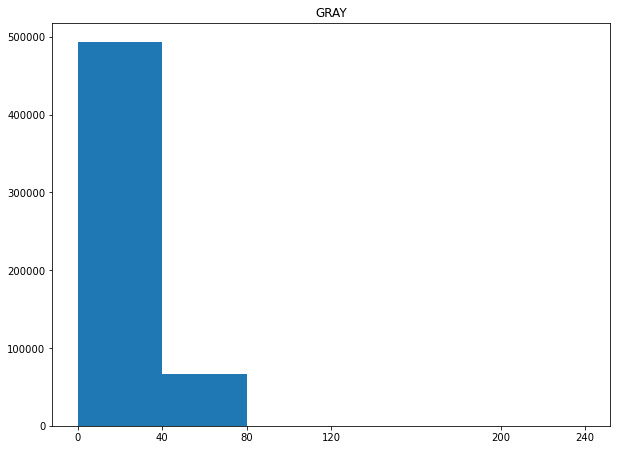

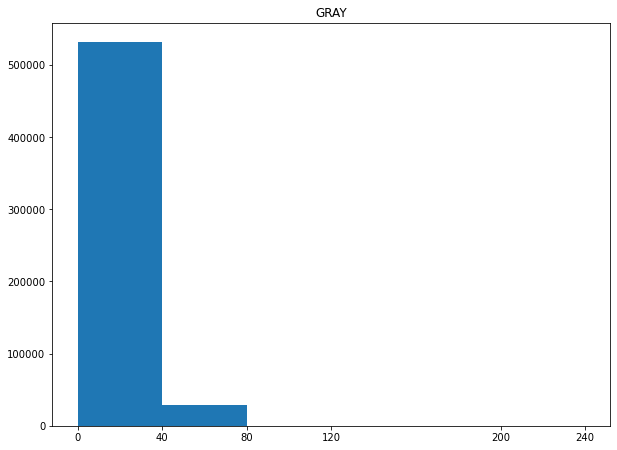

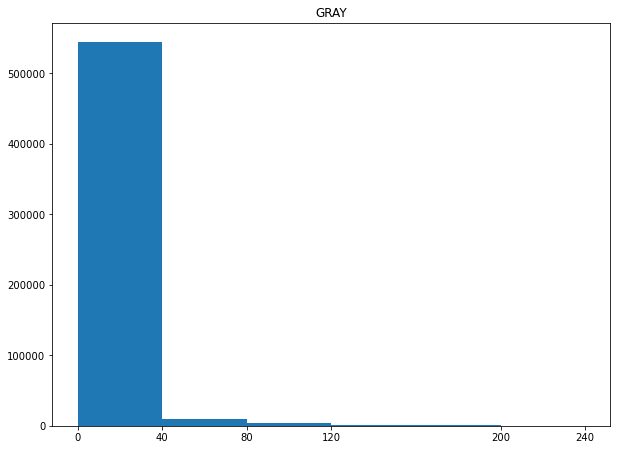

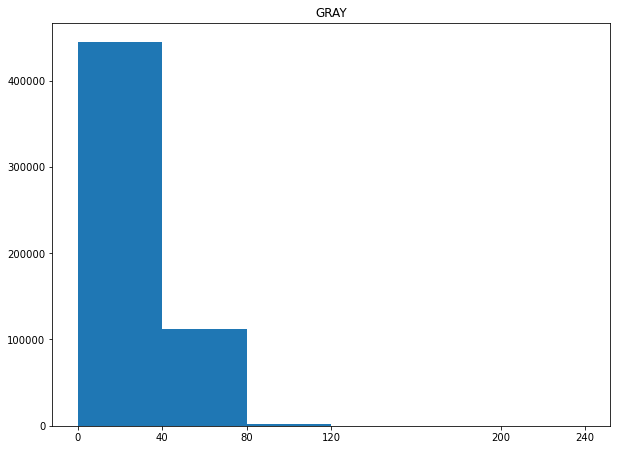

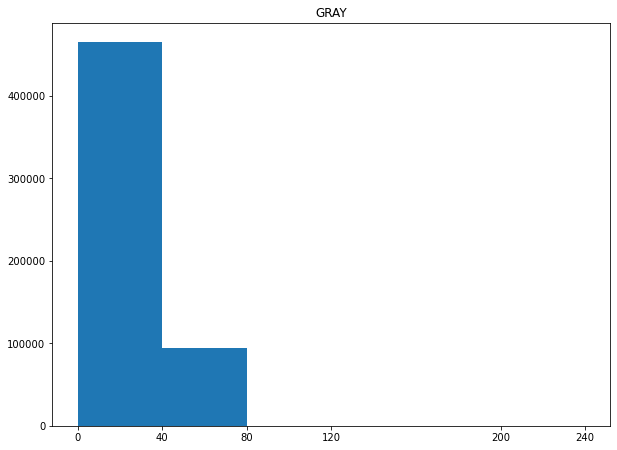

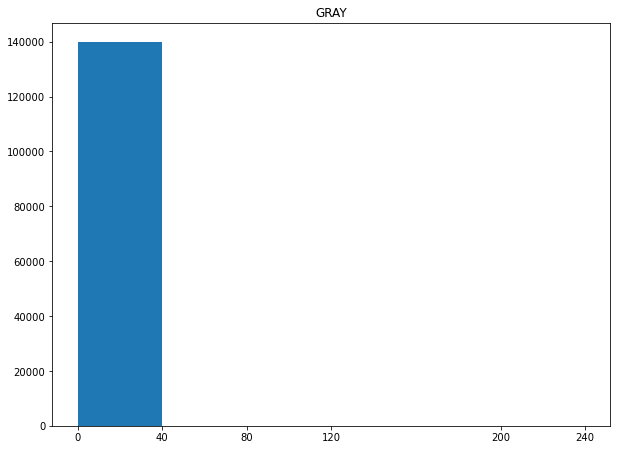

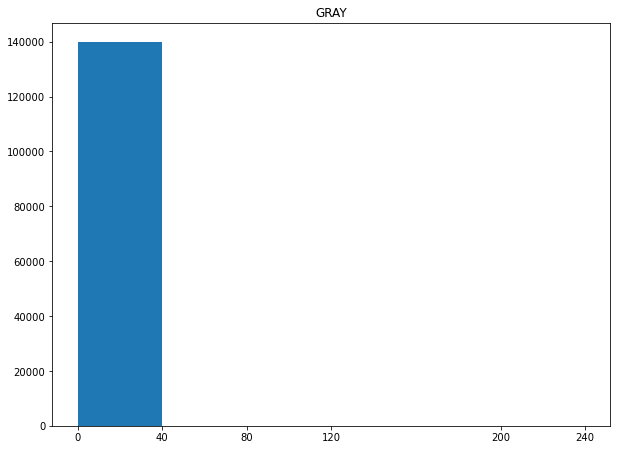

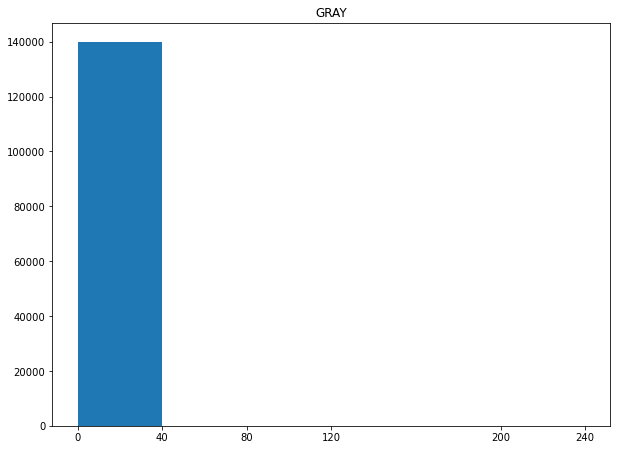

어두운 이미지
4 ./data/test1\FA0002_GW01_H01_0001_20211109132103_farm_image_real_99242d8b4ddd.jpg


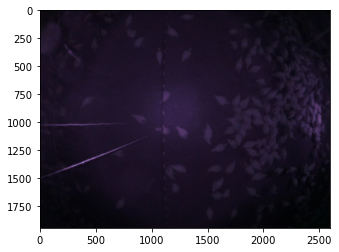

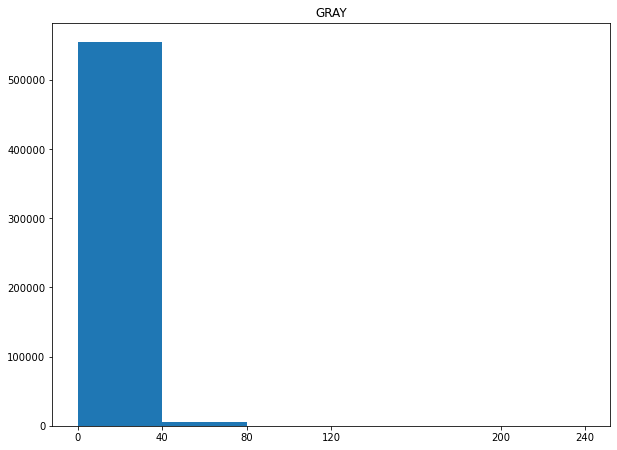

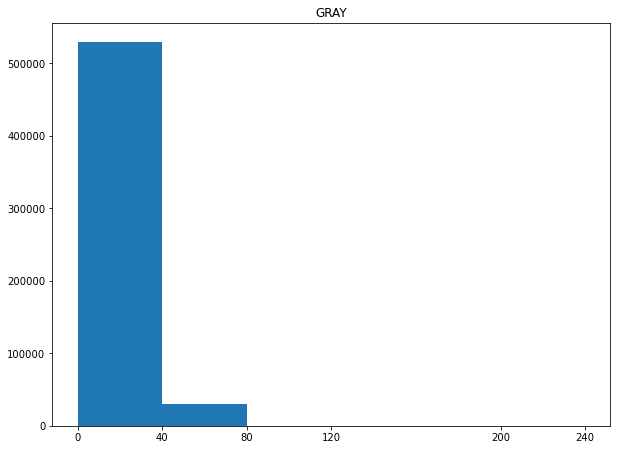

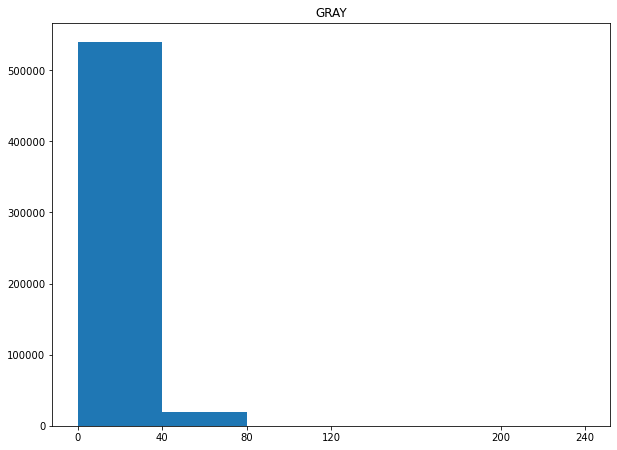

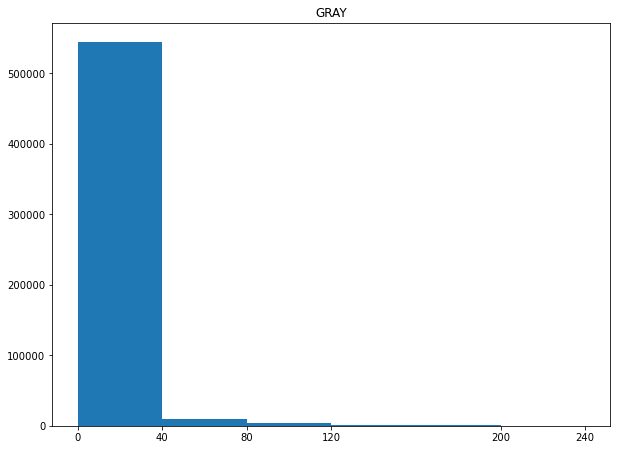

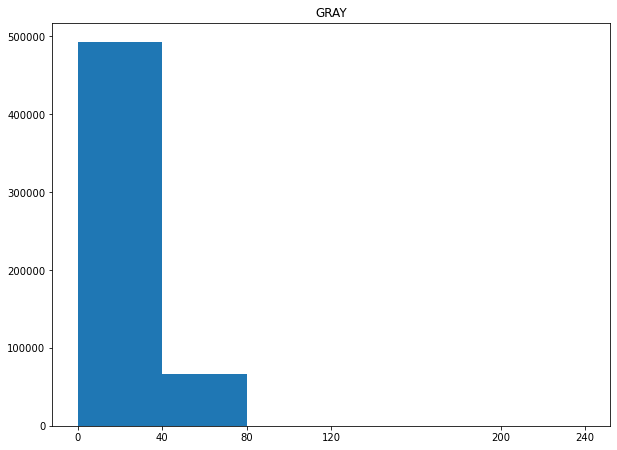

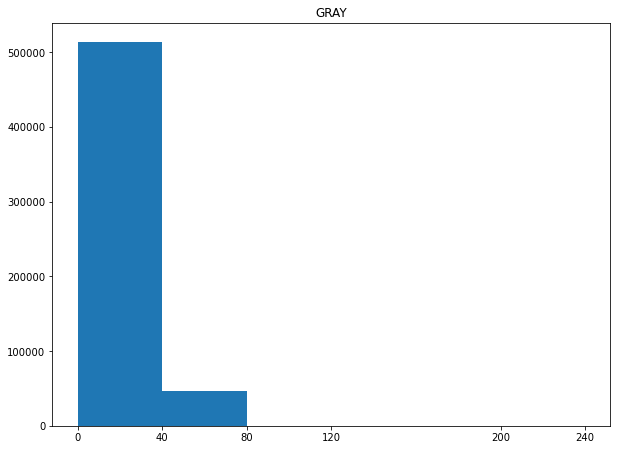

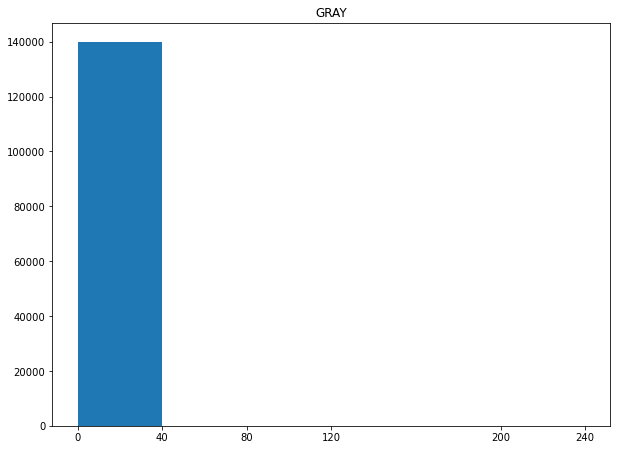

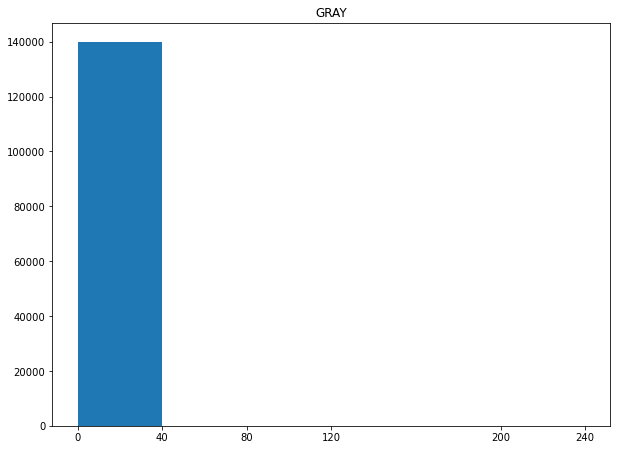

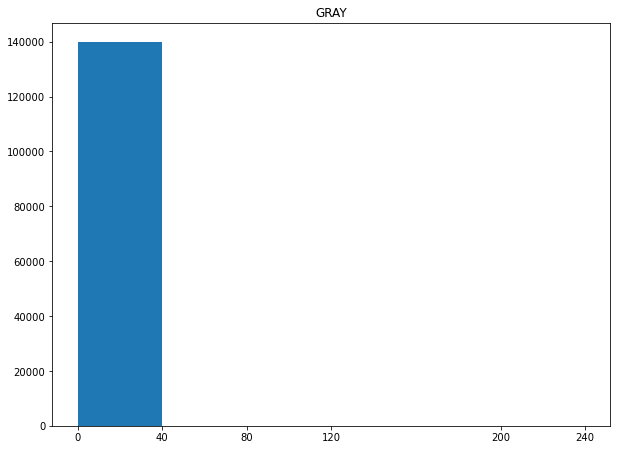

어두운 이미지
5 ./data/test1\FA0002_GW01_H01_0001_20211109133107_farm_image_real_e7839508418c.jpg


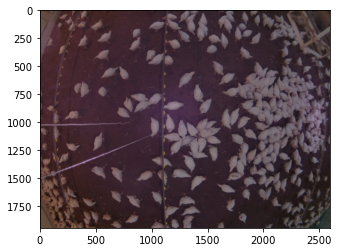

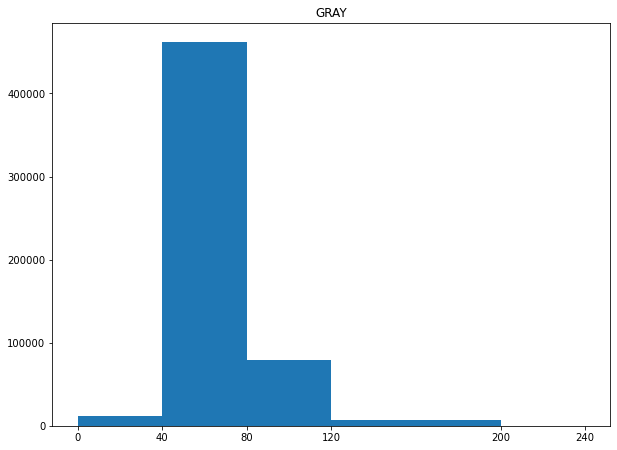

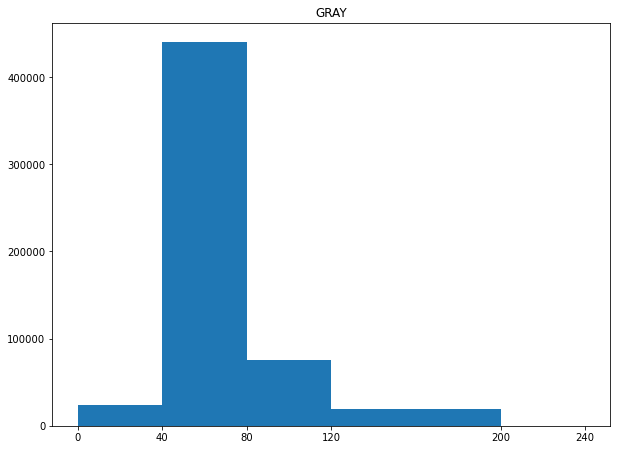

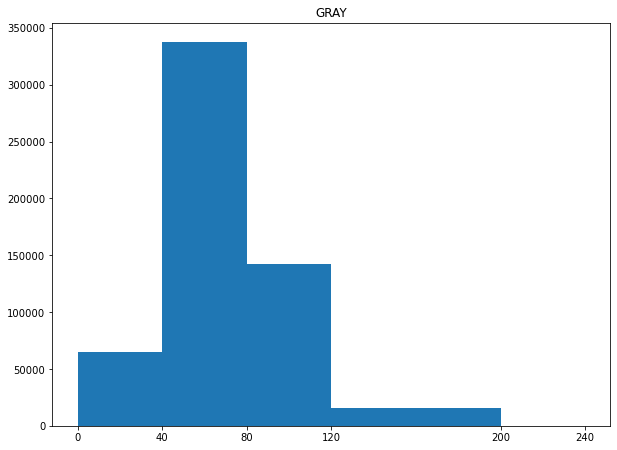

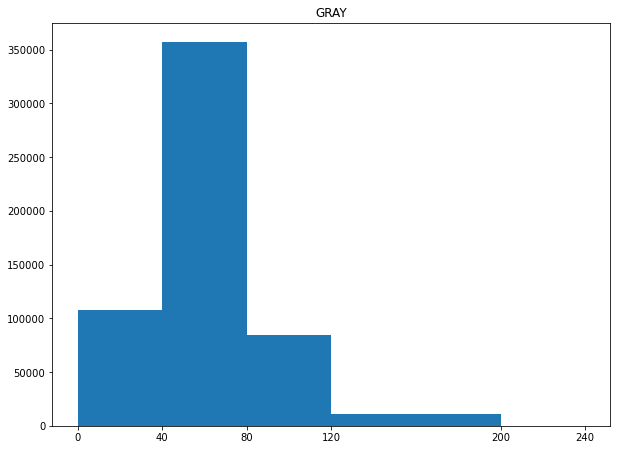

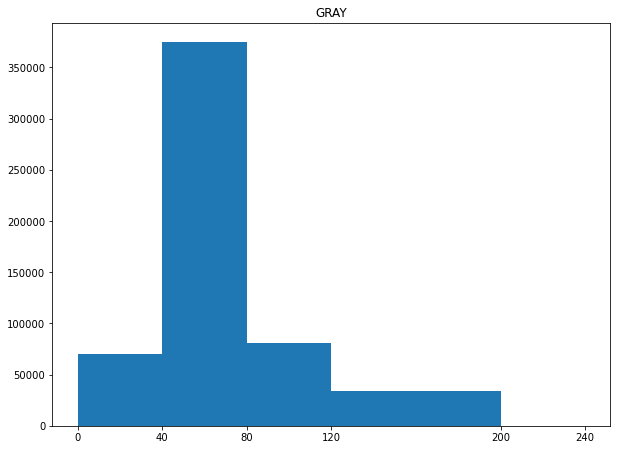

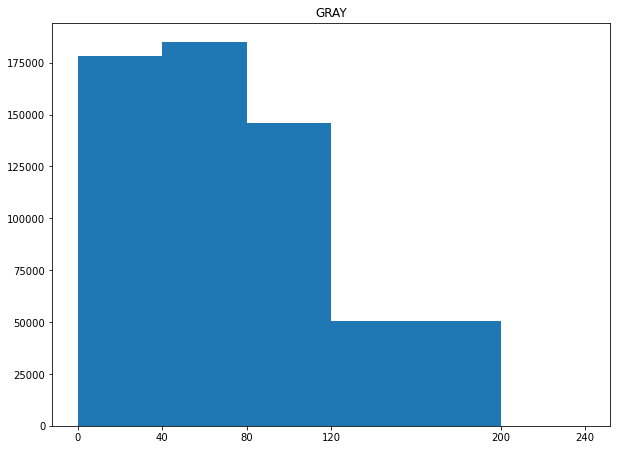

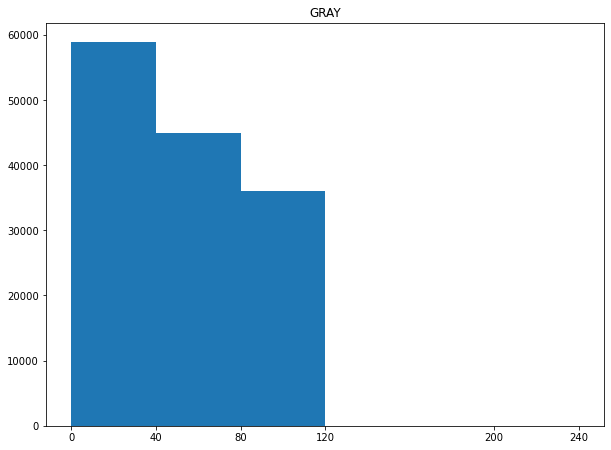

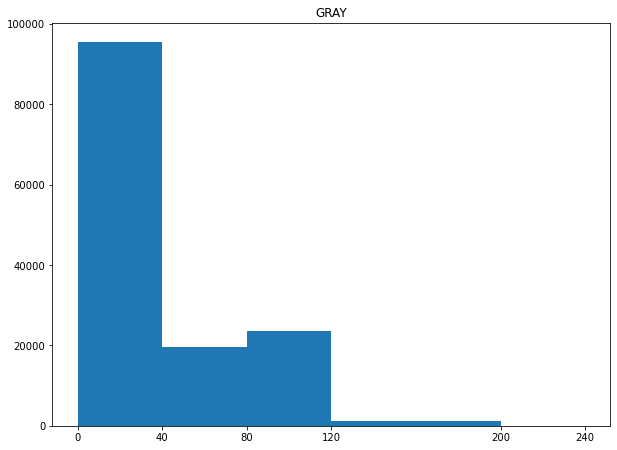

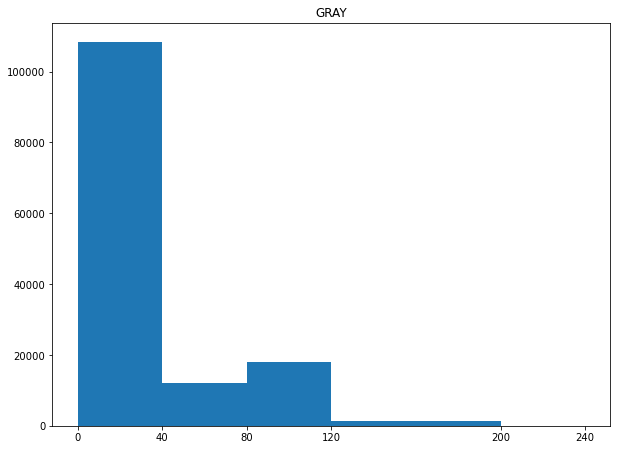

어두운 이미지
6 ./data/test1\FA0002_GW01_H01_0002_20211101094826_farm_image_real_1d41a0014ec3.jpg


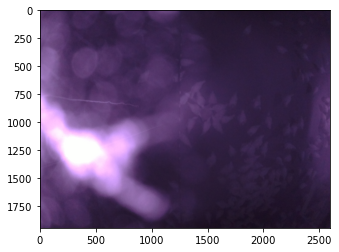

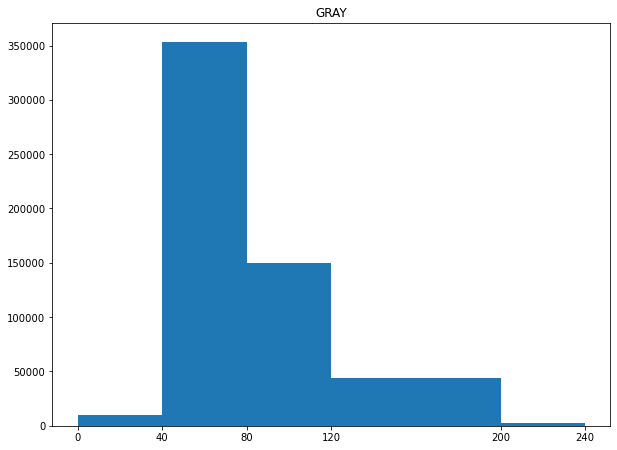

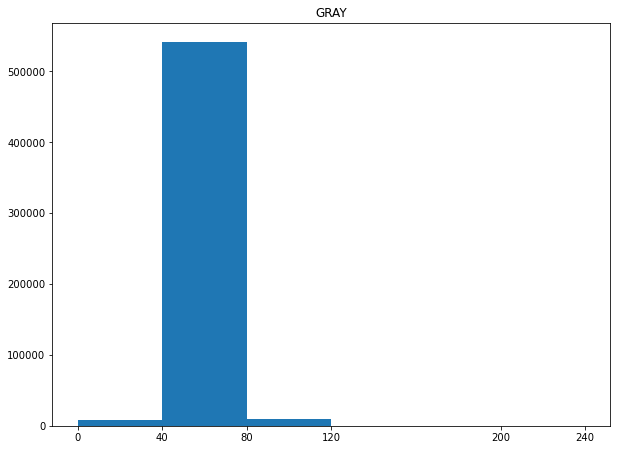

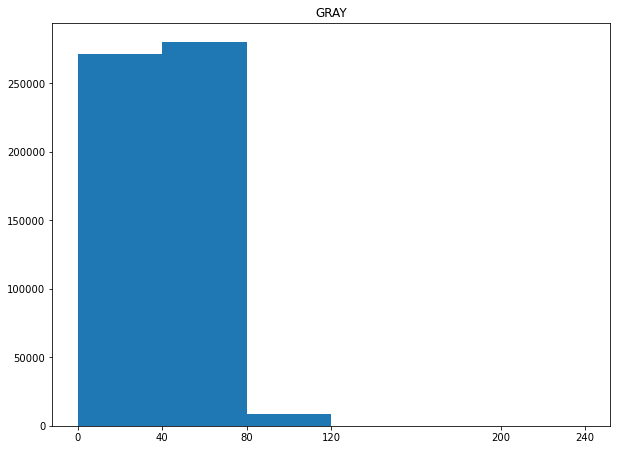

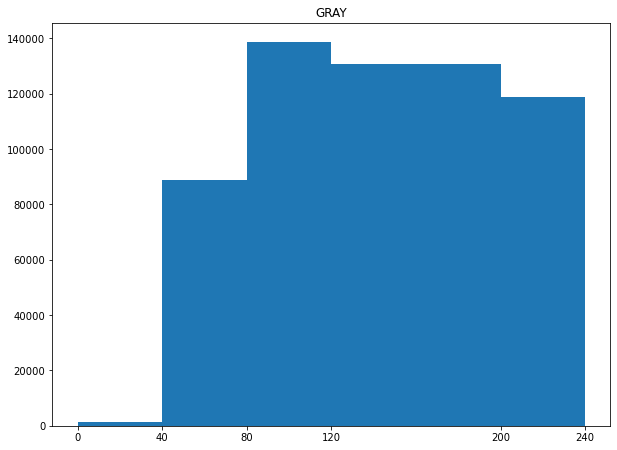

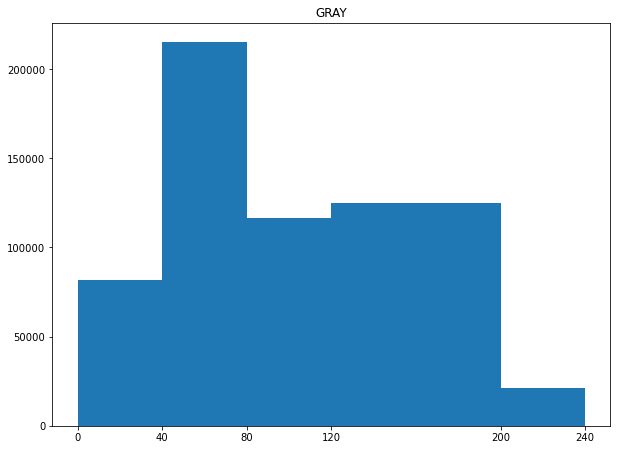

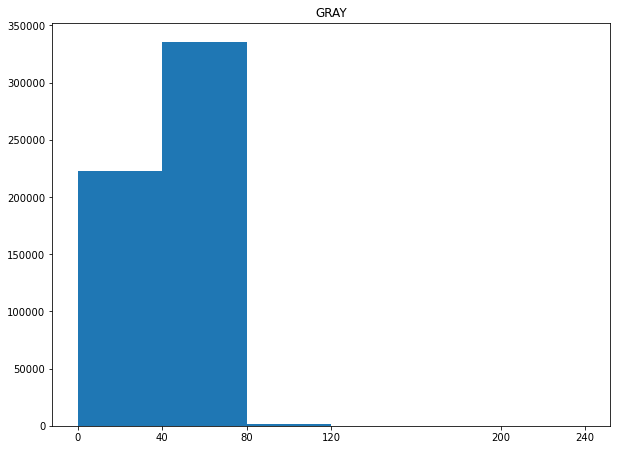

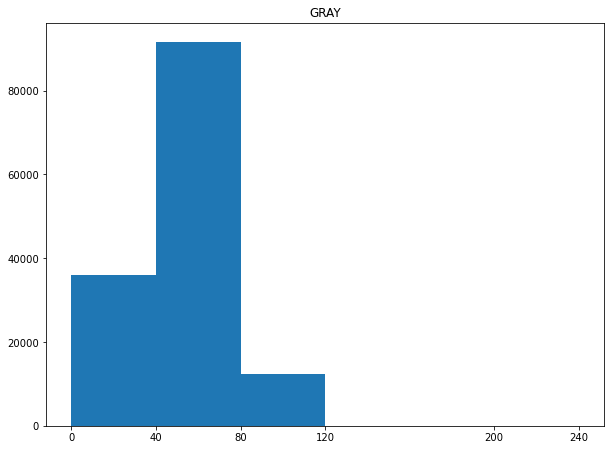

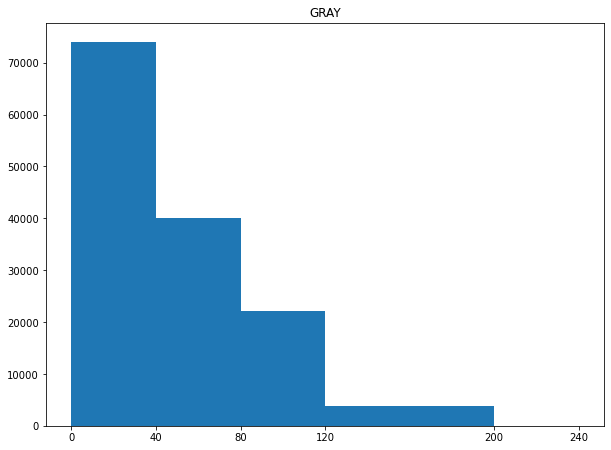

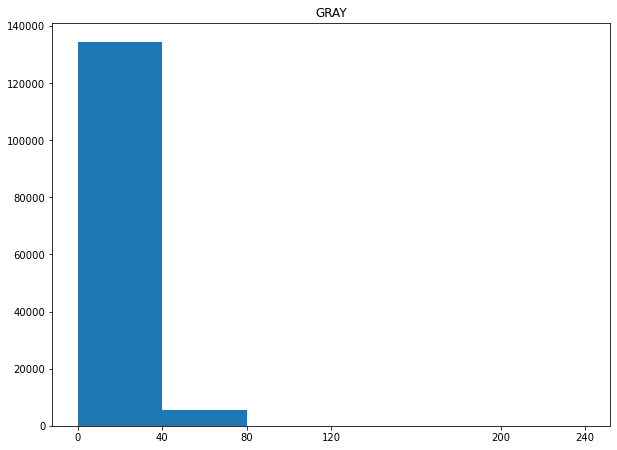

어두운 이미지
7 ./data/test1\FA0002_GW01_H01_0002_20211101153031_farm_image_real_1790ae0b413d.jpg


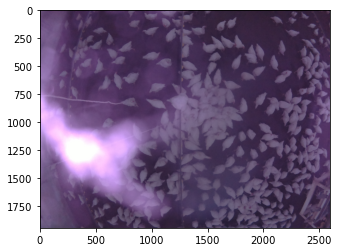

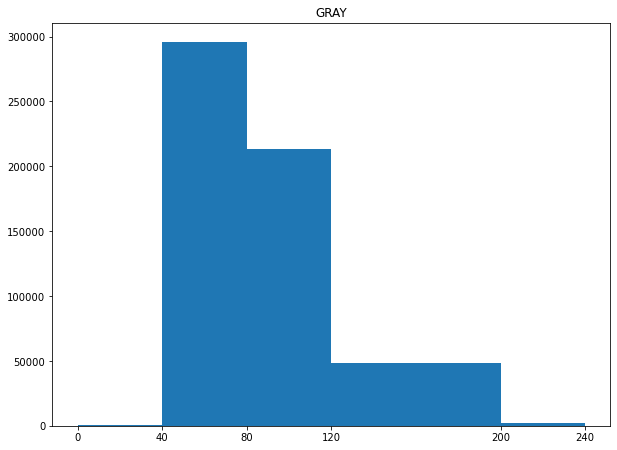

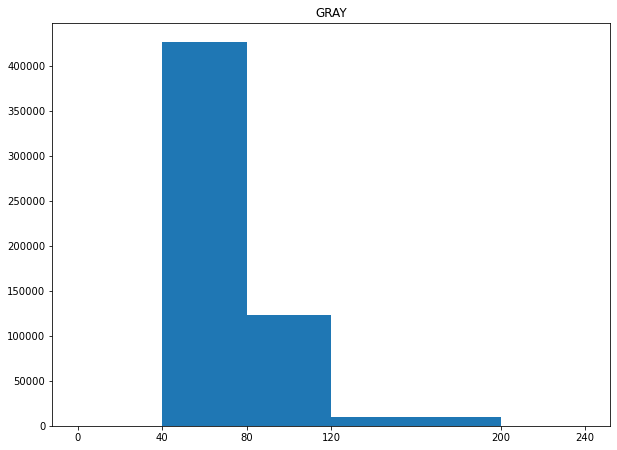

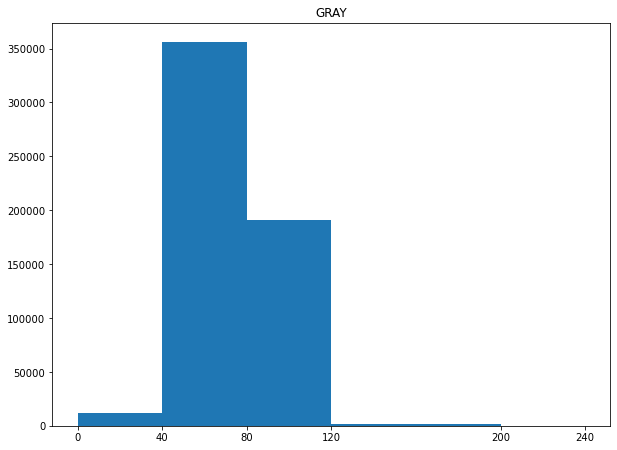

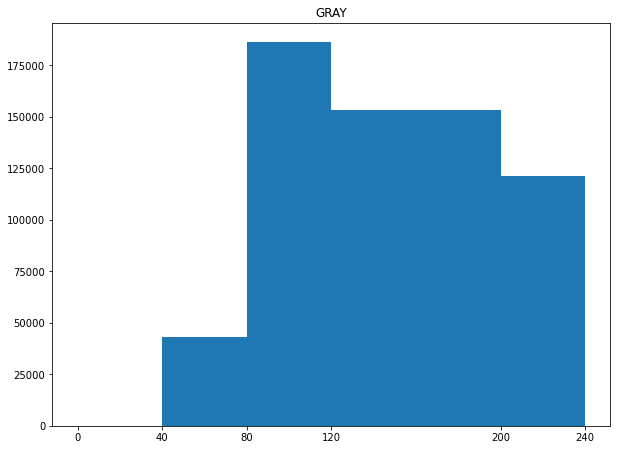

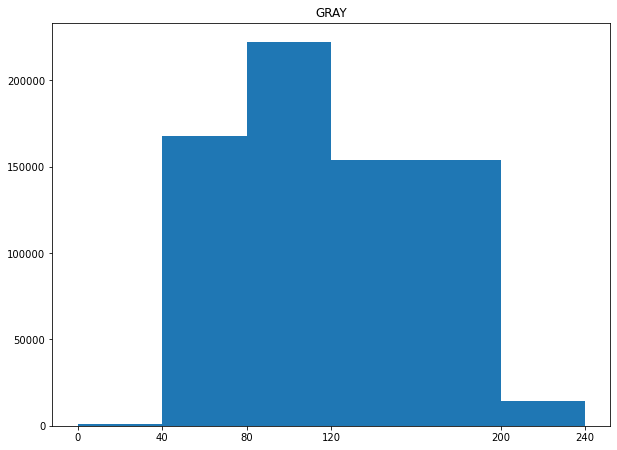

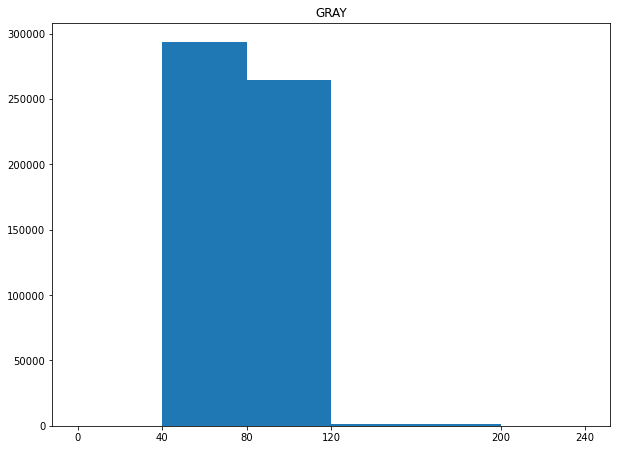

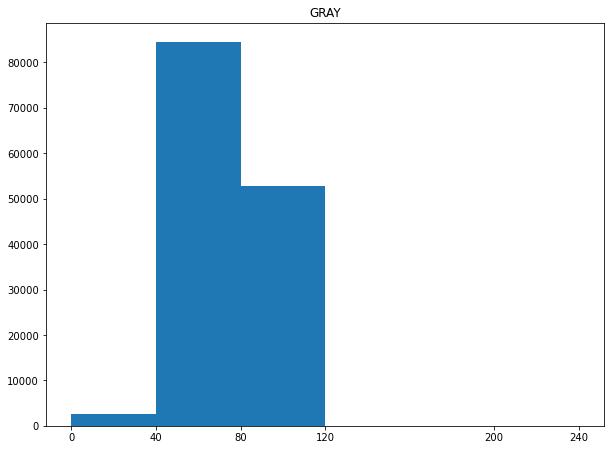

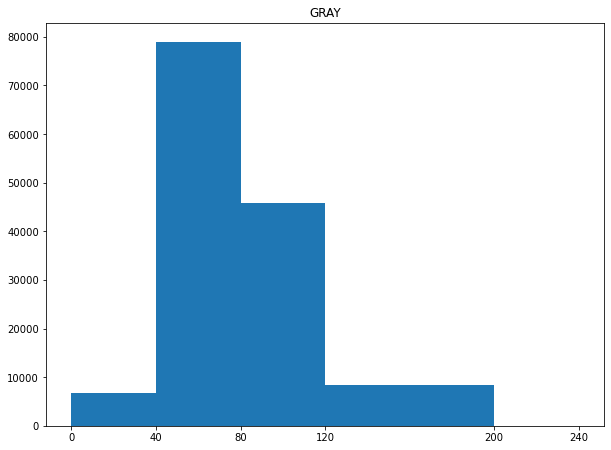

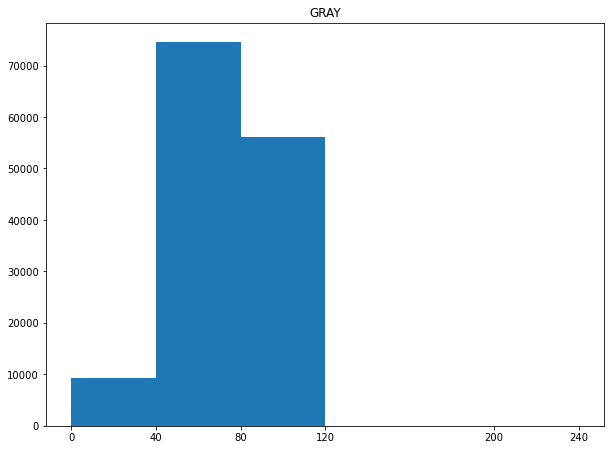

밝은 이미지
8 ./data/test1\FA0002_GW01_H01_0002_20211102142429_farm_image_real_8a1cb4424b63.jpg


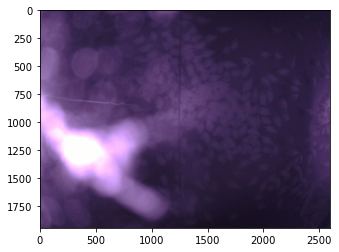

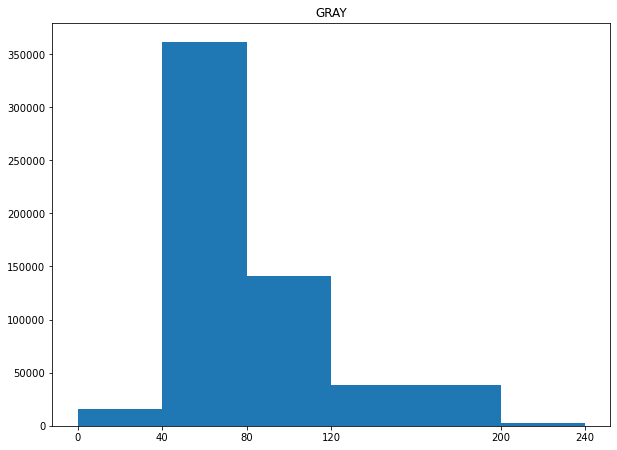

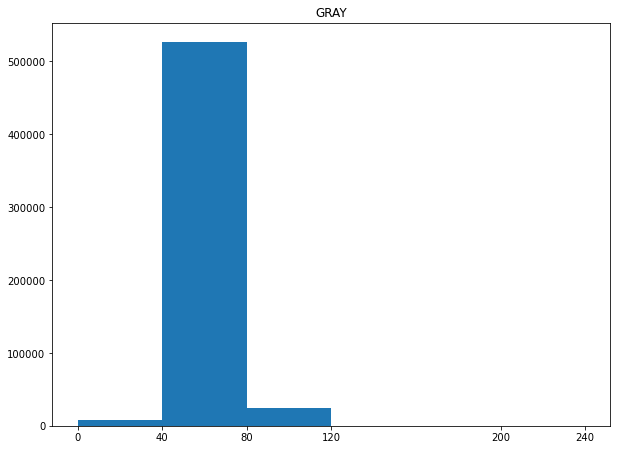

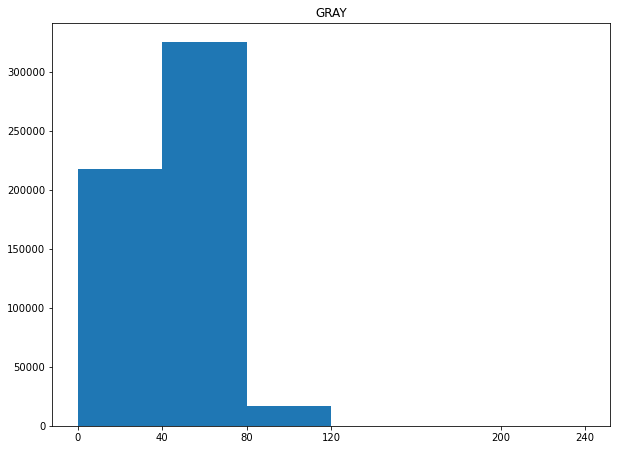

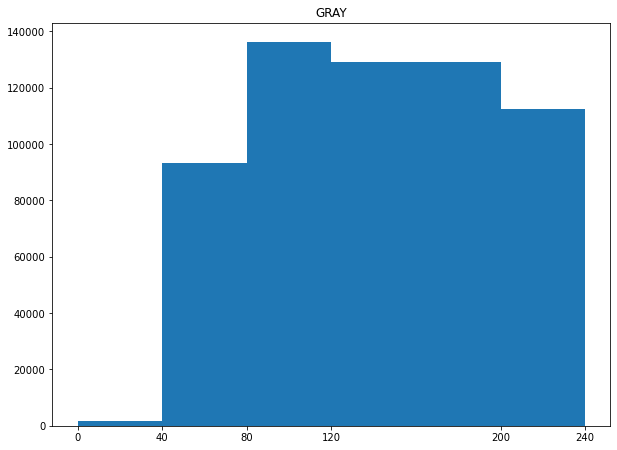

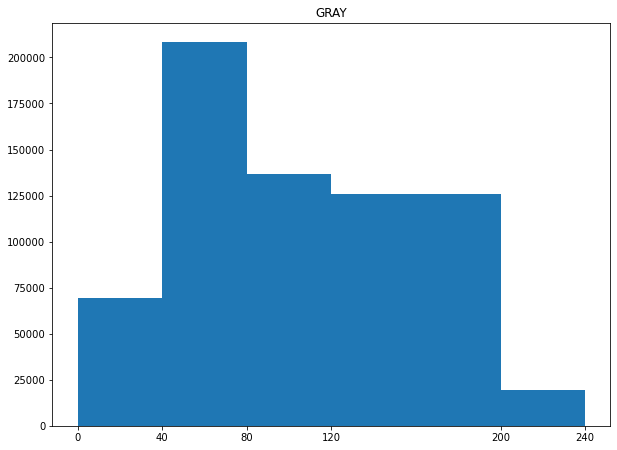

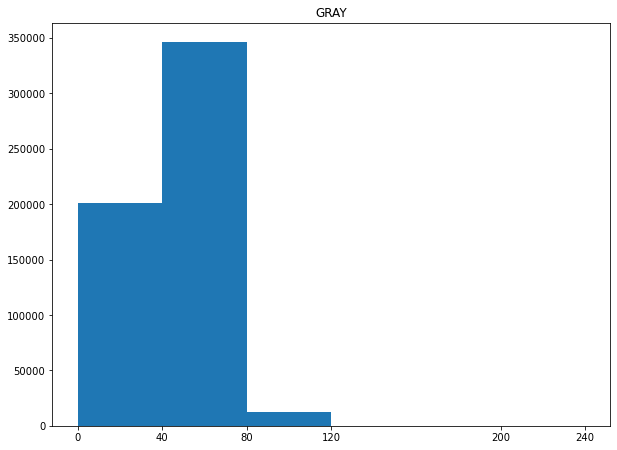

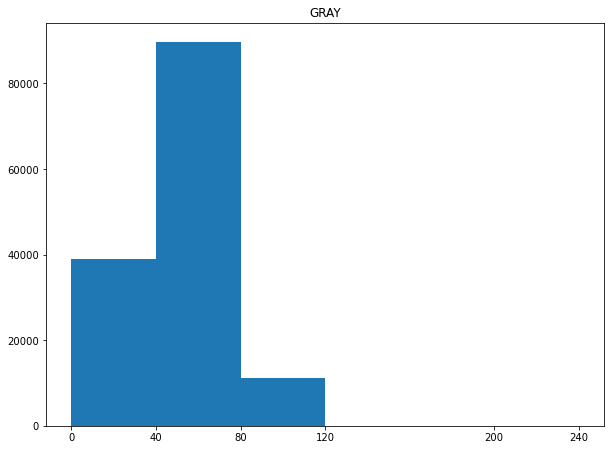

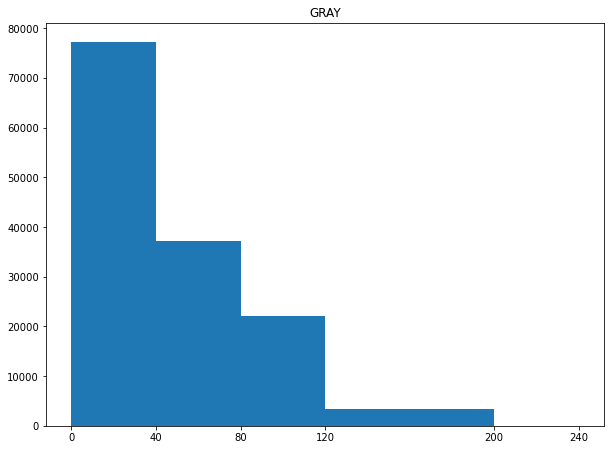

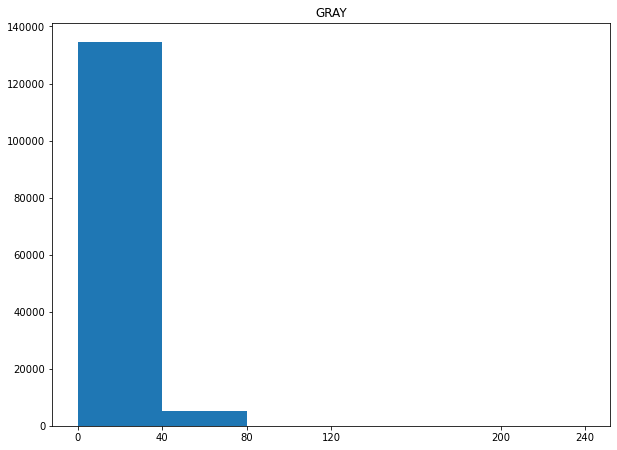

어두운 이미지
9 ./data/test1\FA0002_GW01_H01_0002_20211109125437_farm_image_real_7576b6014d17.jpg


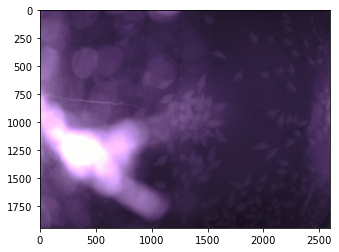

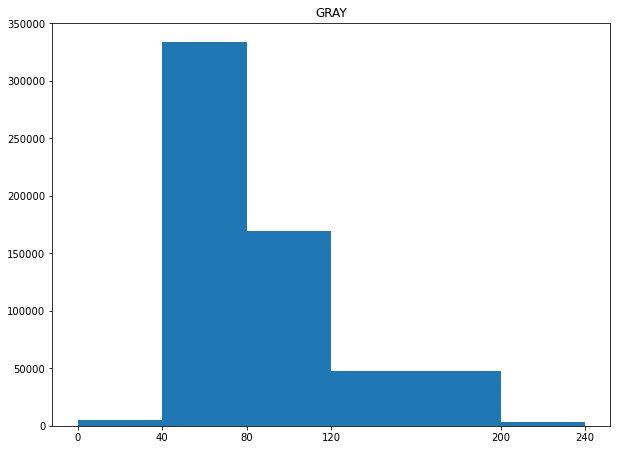

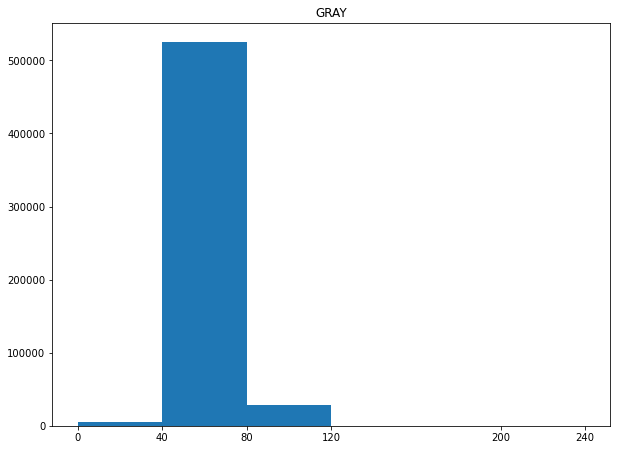

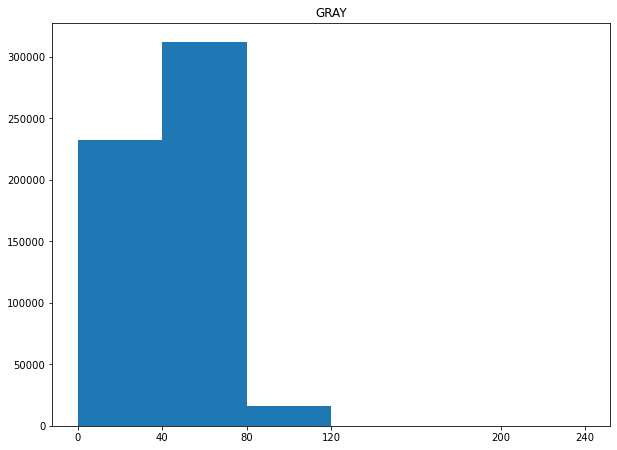

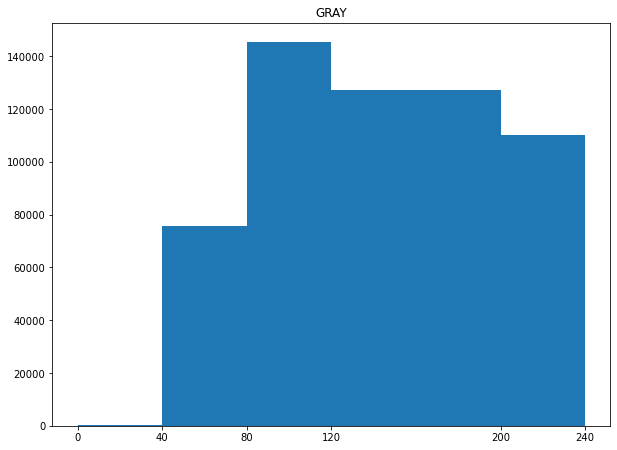

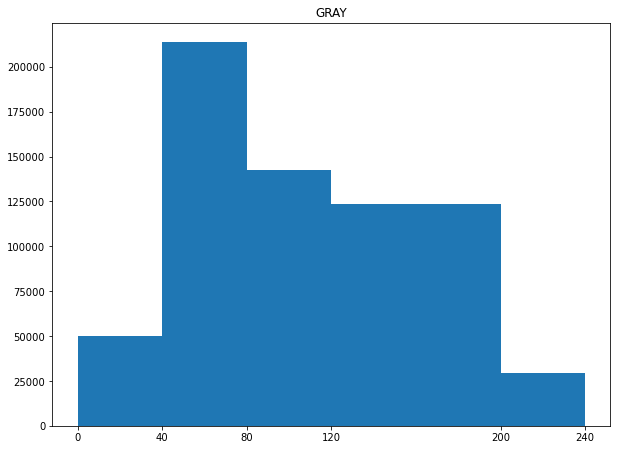

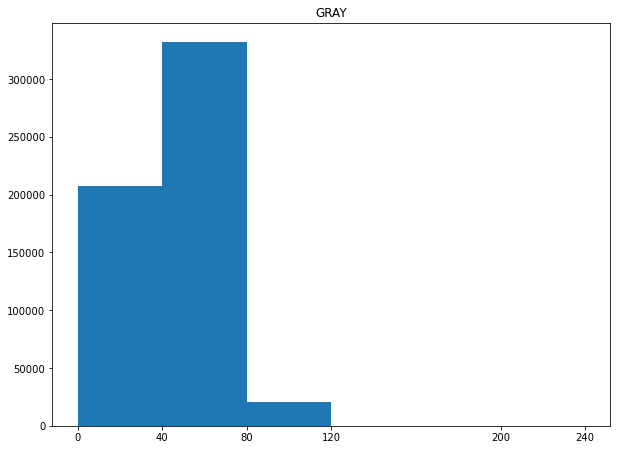

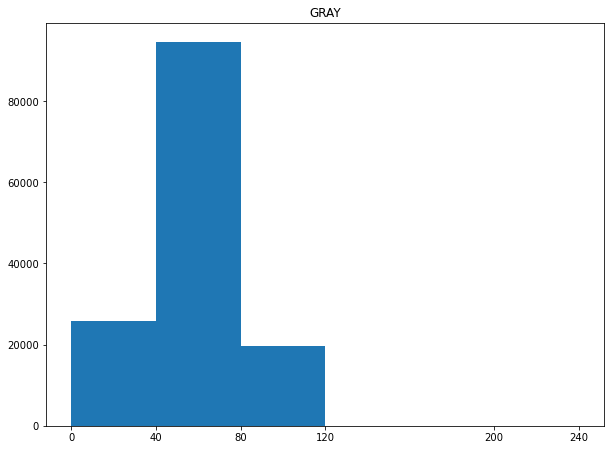

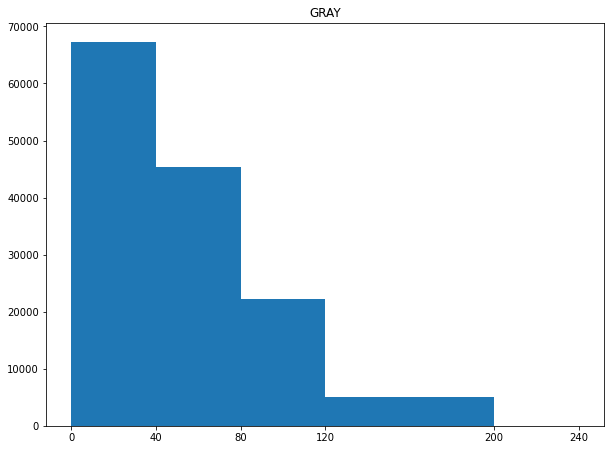

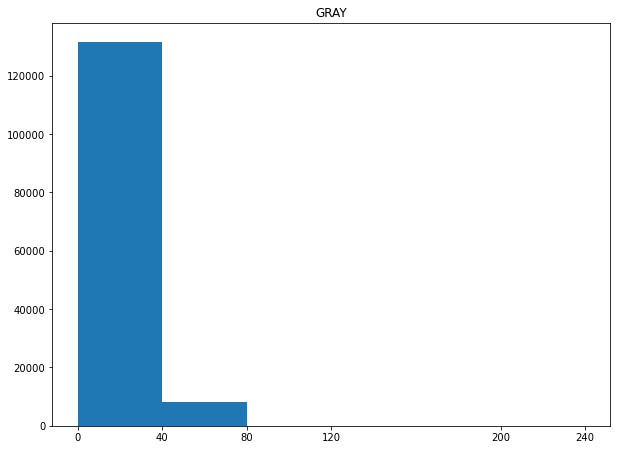

어두운 이미지
10 ./data/test1\FA0002_GW01_H01_0002_20211109130634_farm_image_real_4c5ca21f459e.jpg


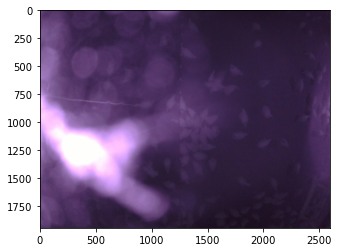

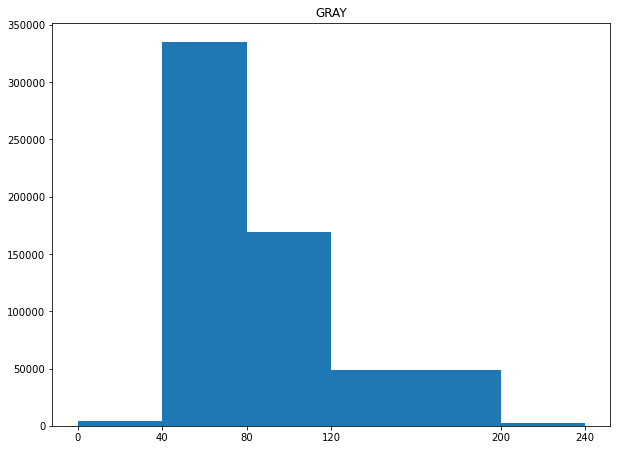

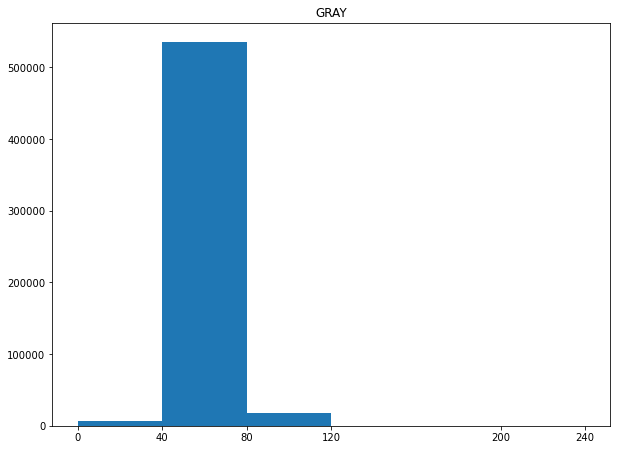

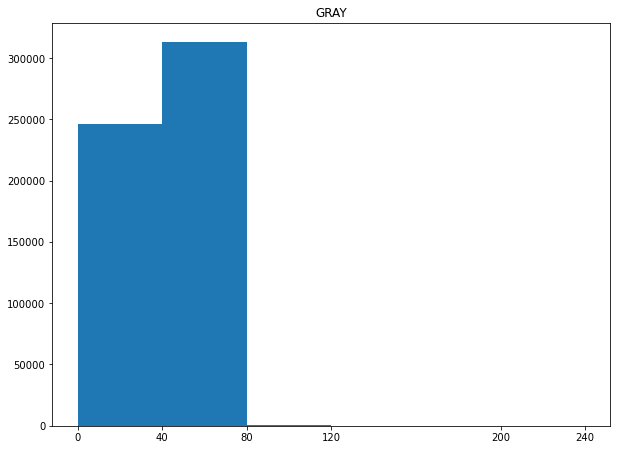

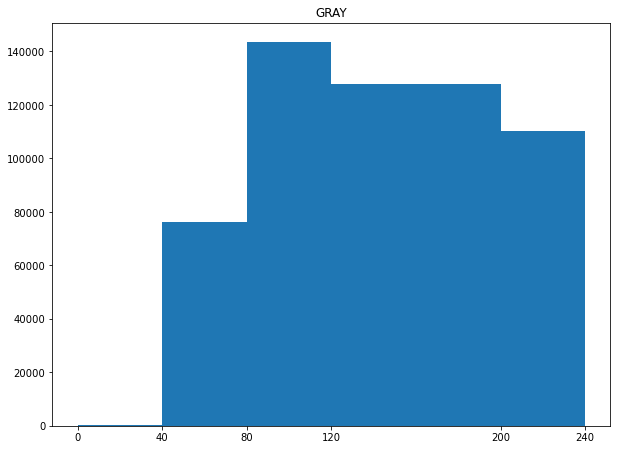

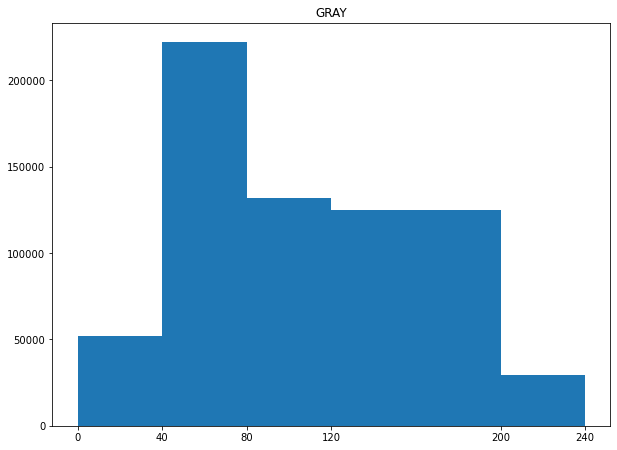

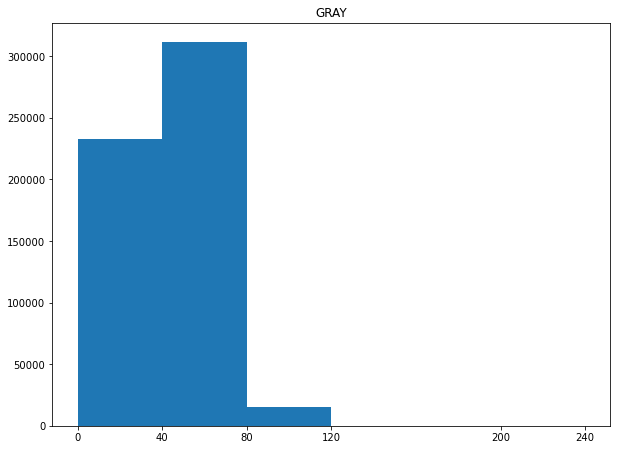

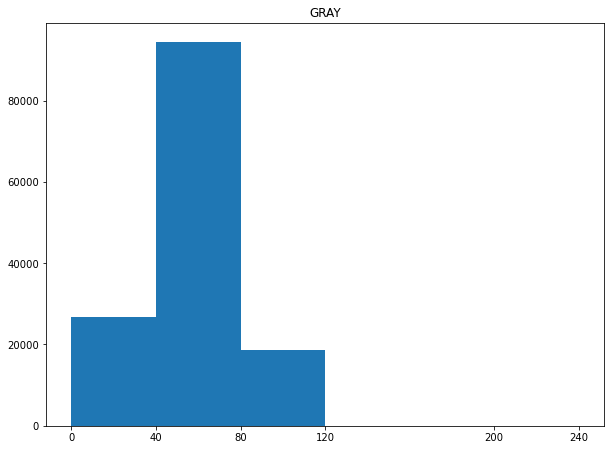

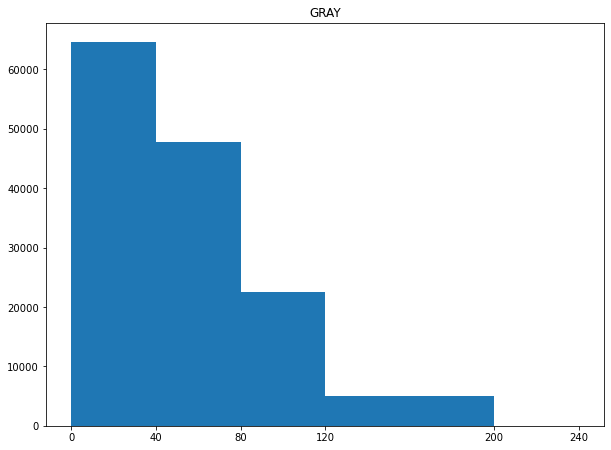

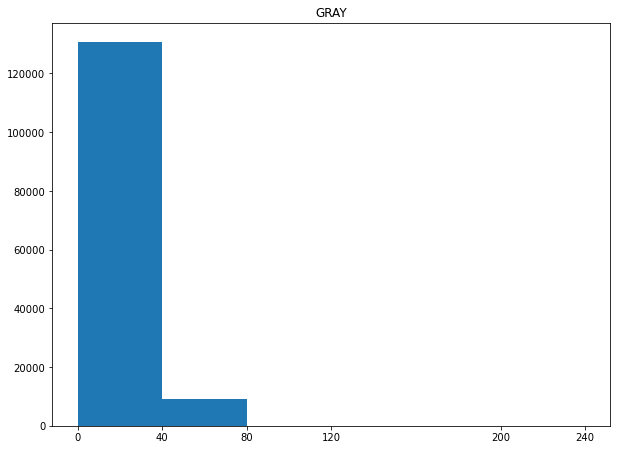

어두운 이미지
11 ./data/test1\FA0002_GW01_H01_0002_20211109131834_farm_image_real_c4c3bc134ea5.jpg


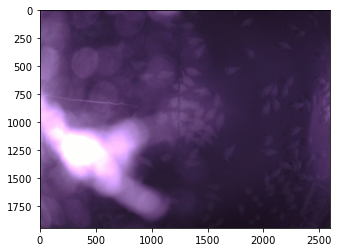

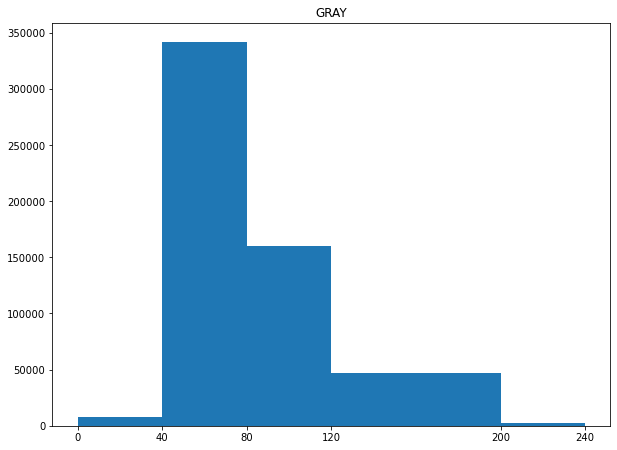

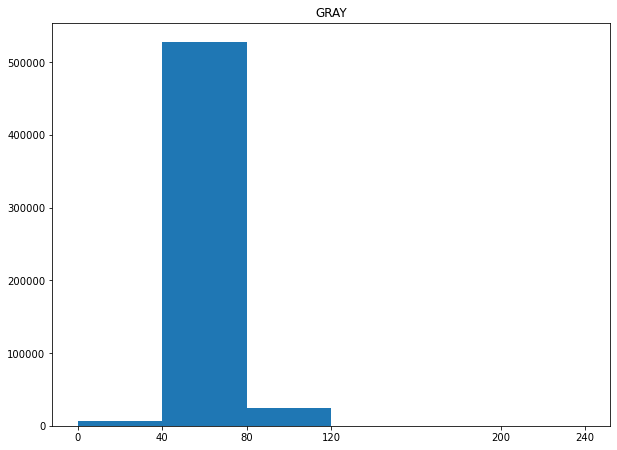

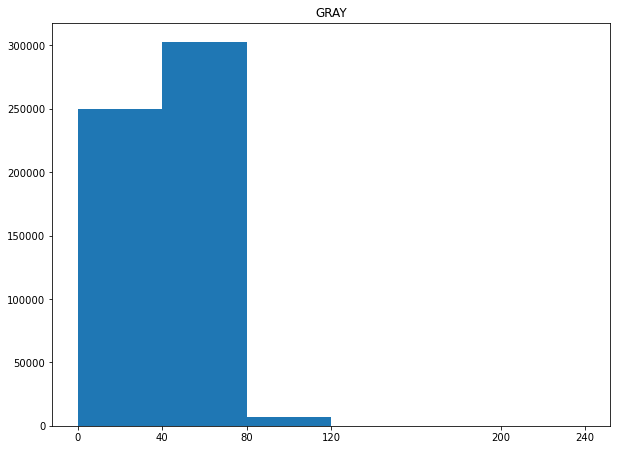

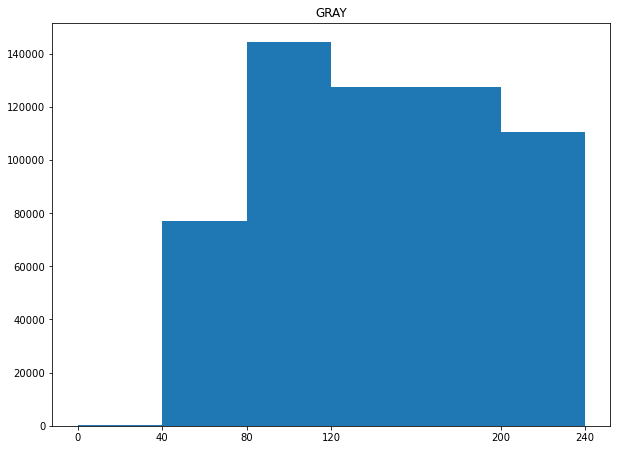

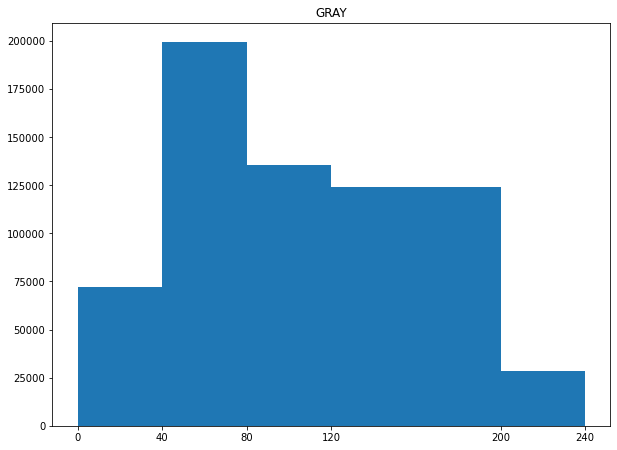

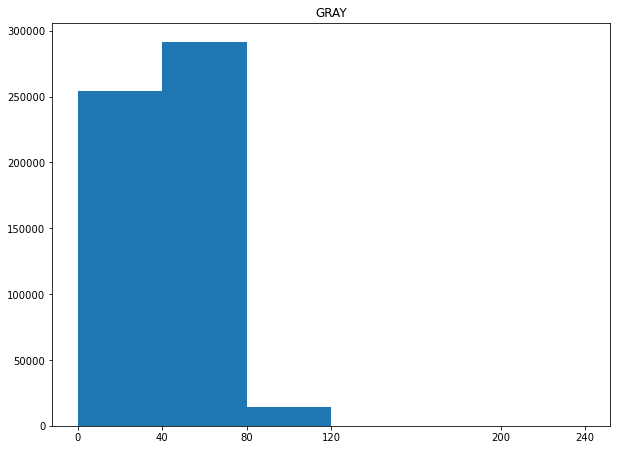

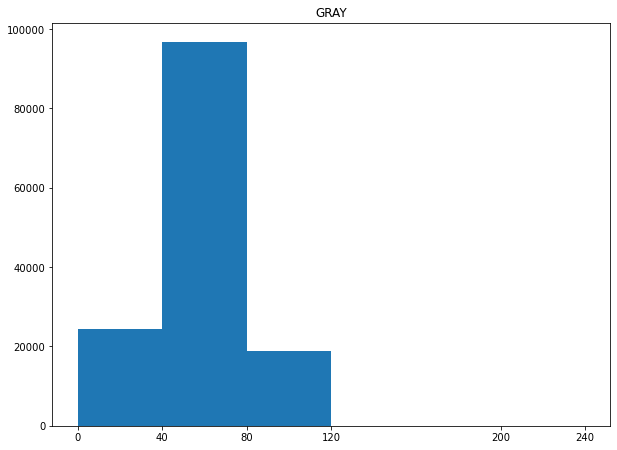

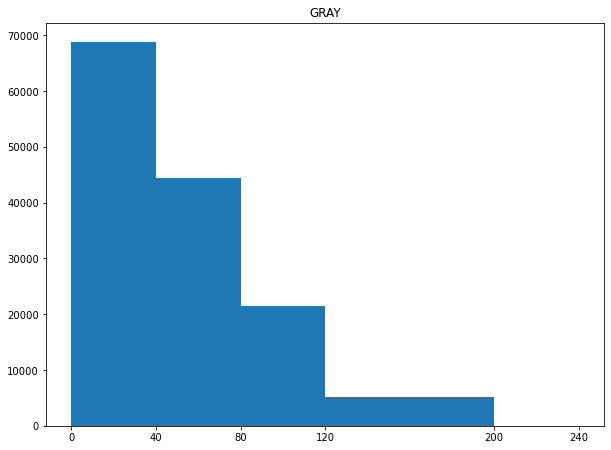

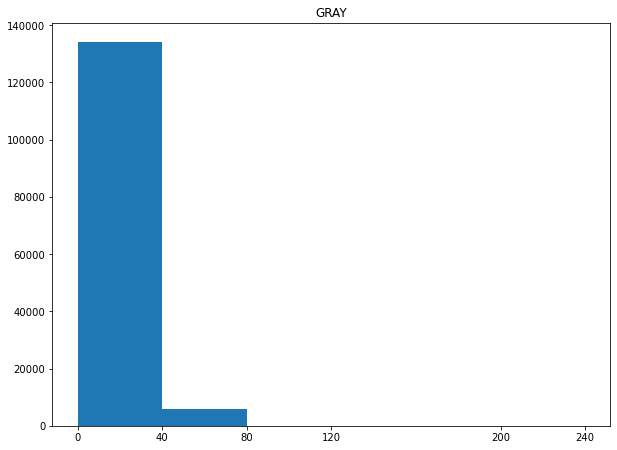

어두운 이미지
12 ./data/test1\FA0002_GW01_H01_0002_20211109134034_farm_image_real_2d90ff2047a6.jpg


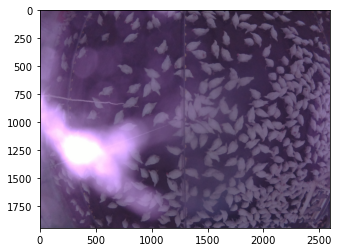

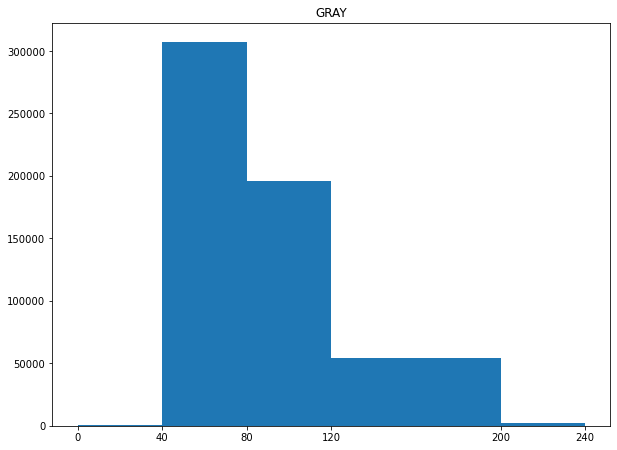

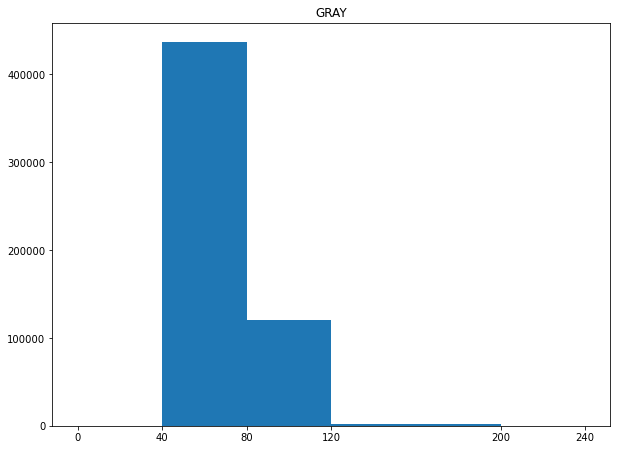

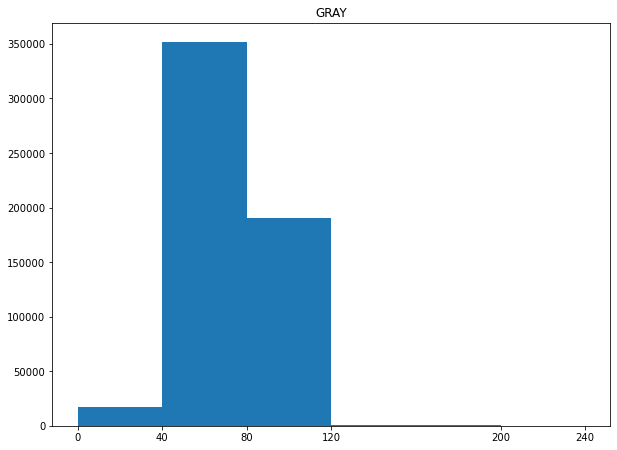

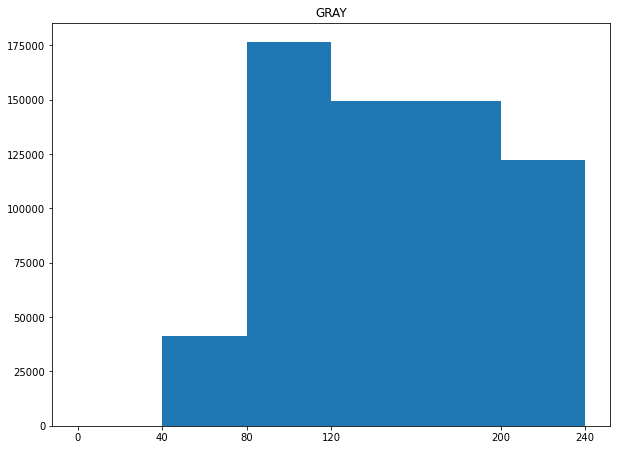

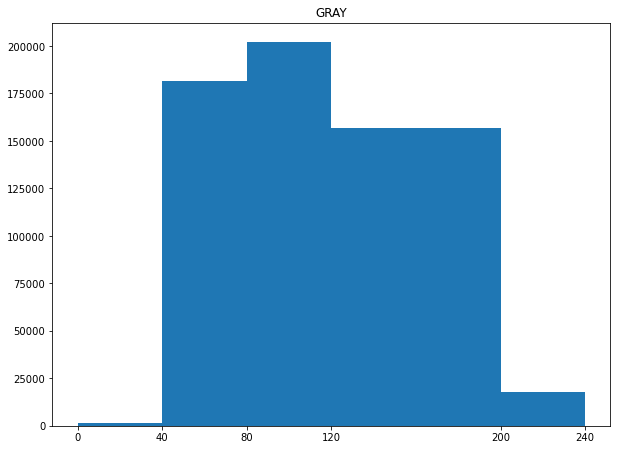

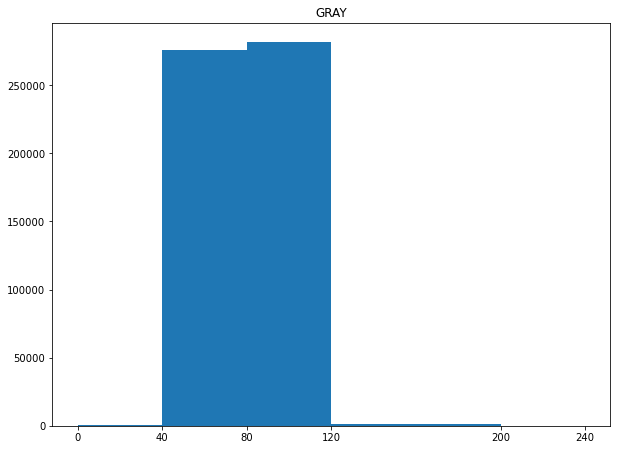

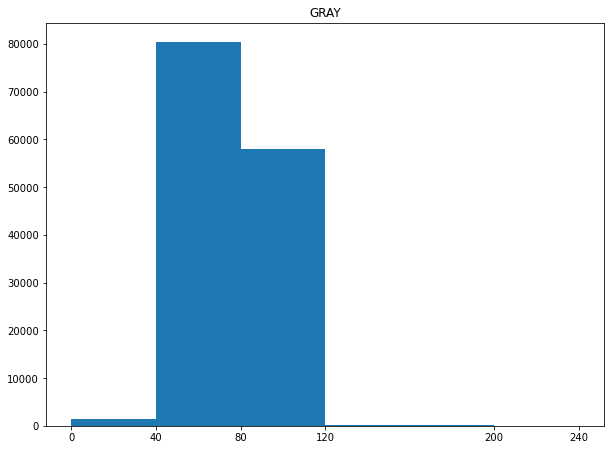

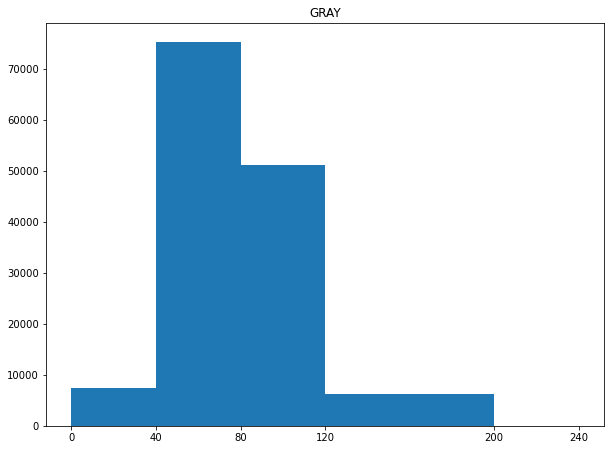

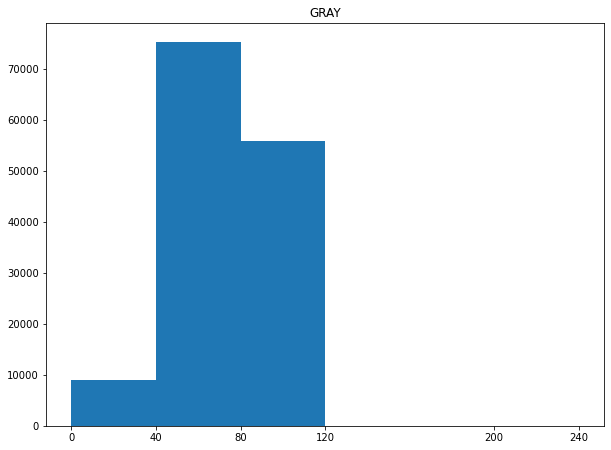

밝은 이미지
13 ./data/test1\FA0002_GW01_H01_0002_20211109155038_farm_image_real_cac4e8ae44b9.jpg


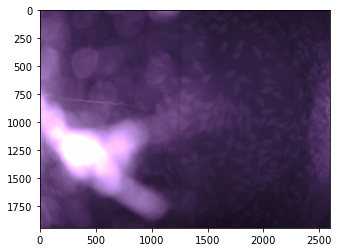

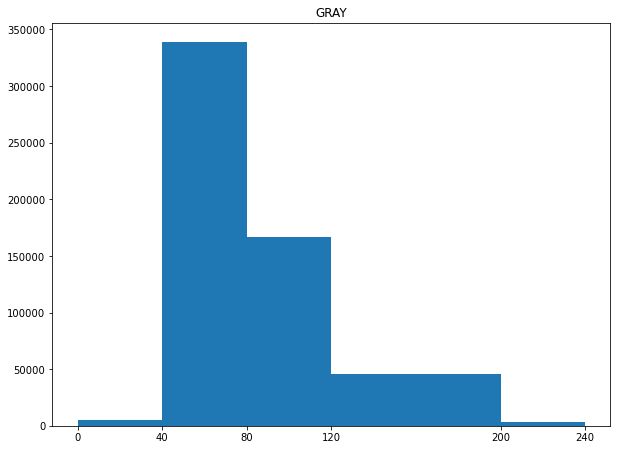

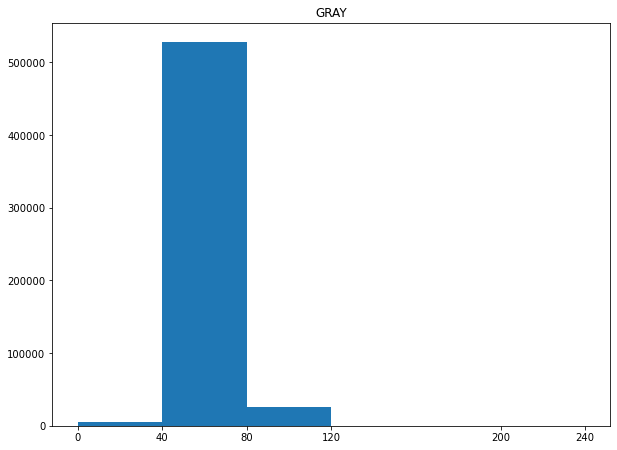

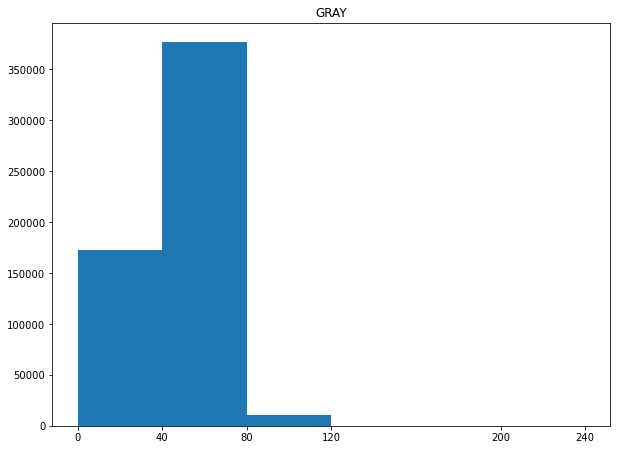

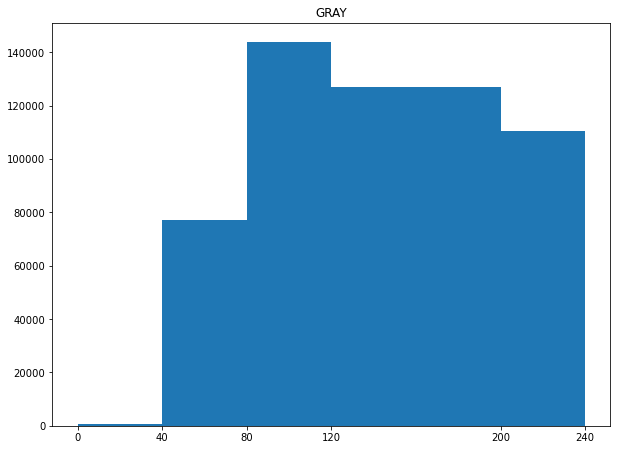

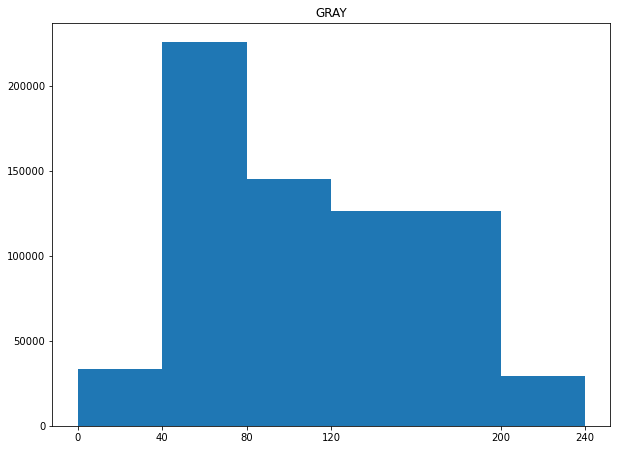

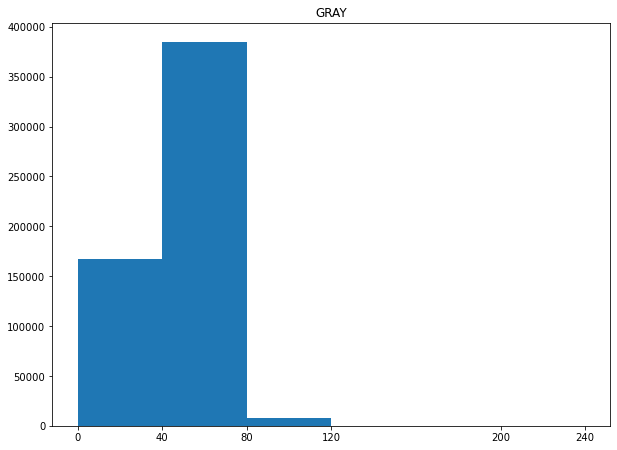

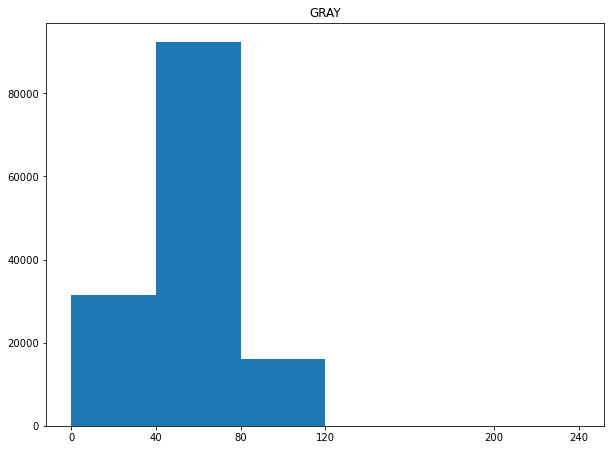

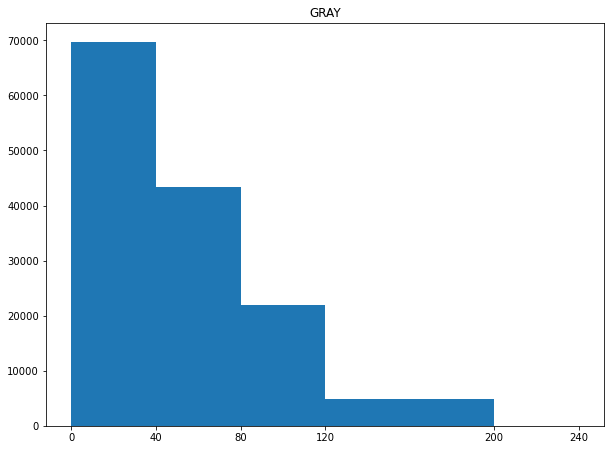

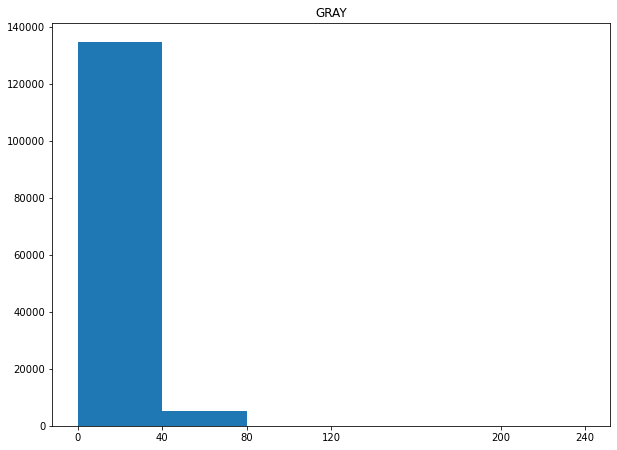

어두운 이미지
14 ./data/test1\FA0002_GW01_H01_0007_20211101153241_farm_image_real_ae5c17974735.jpg


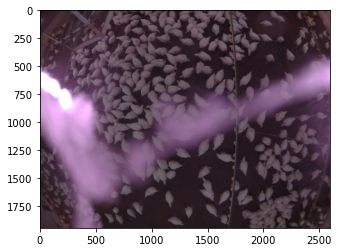

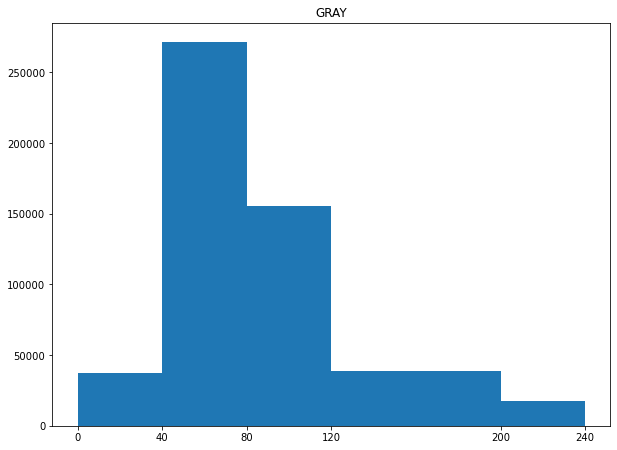

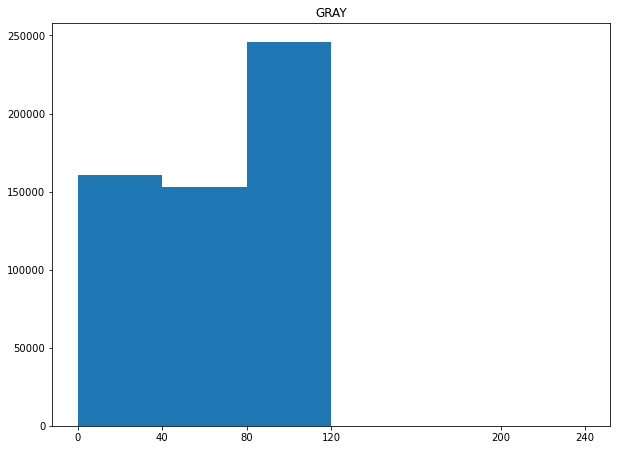

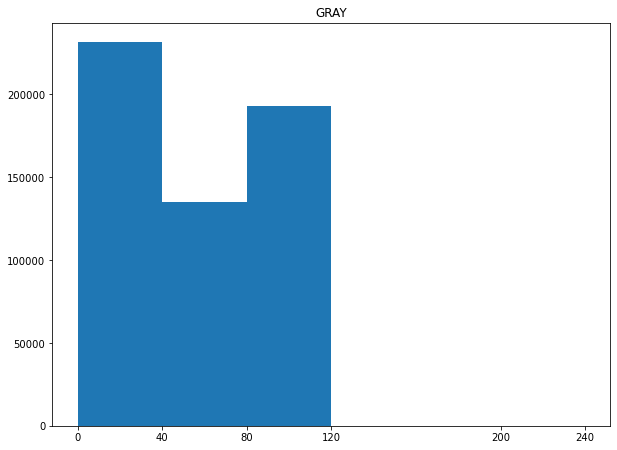

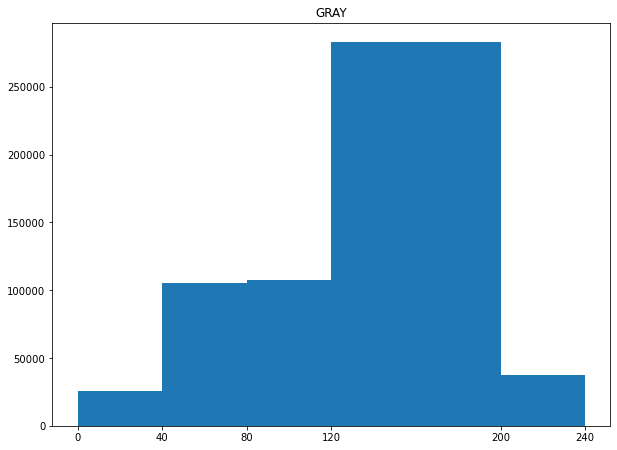

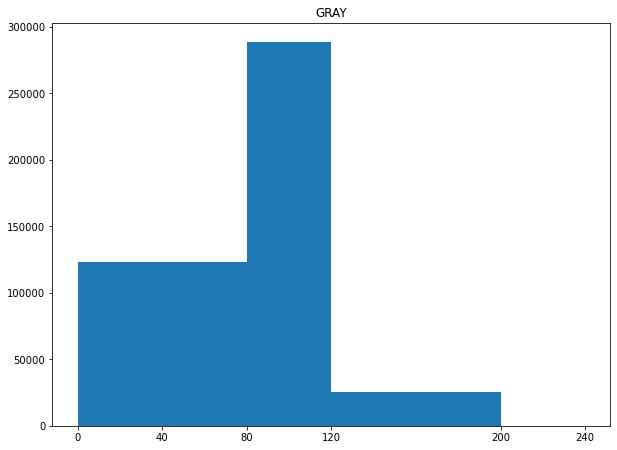

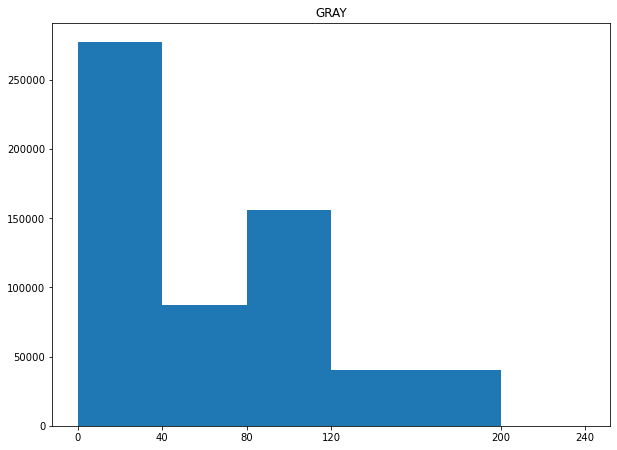

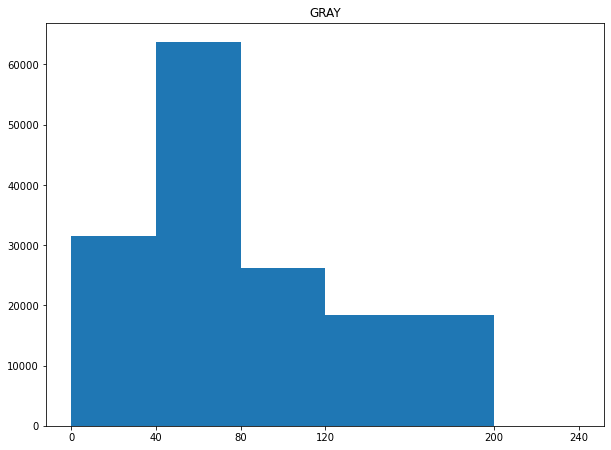

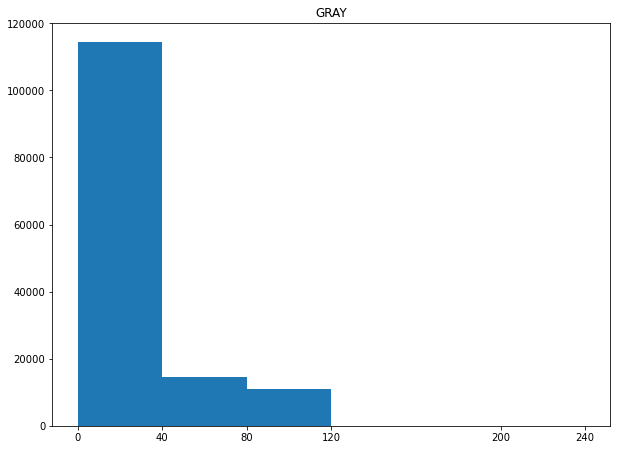

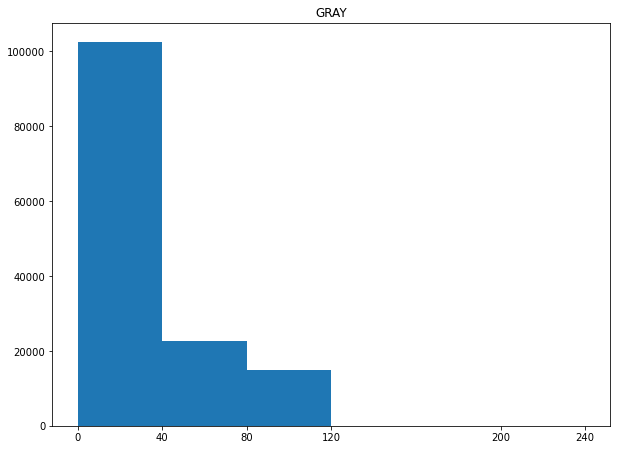

어두운 이미지
15 ./data/test1\FA0002_GW01_H01_0007_20211109140443_farm_image_real_9c9f17af4b75.jpg


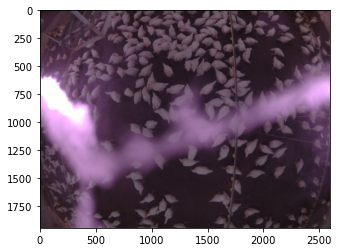

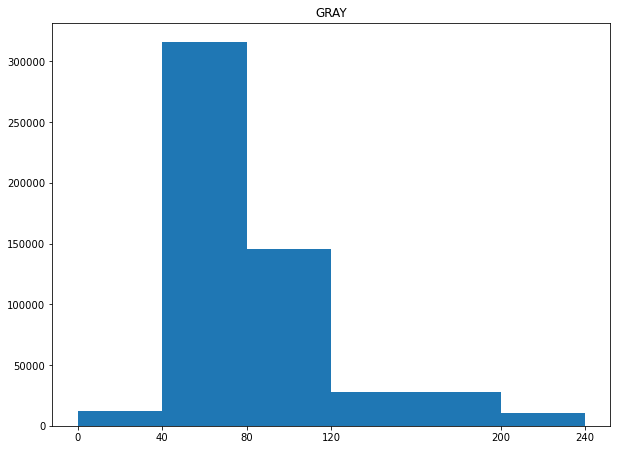

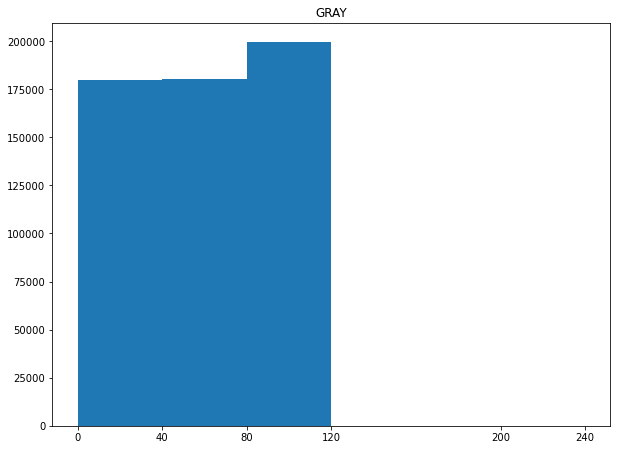

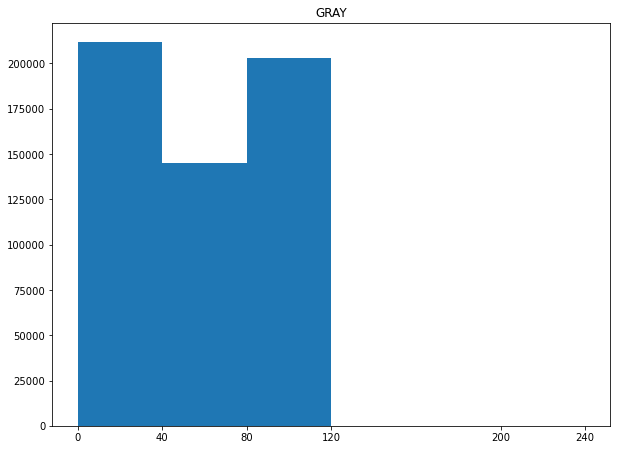

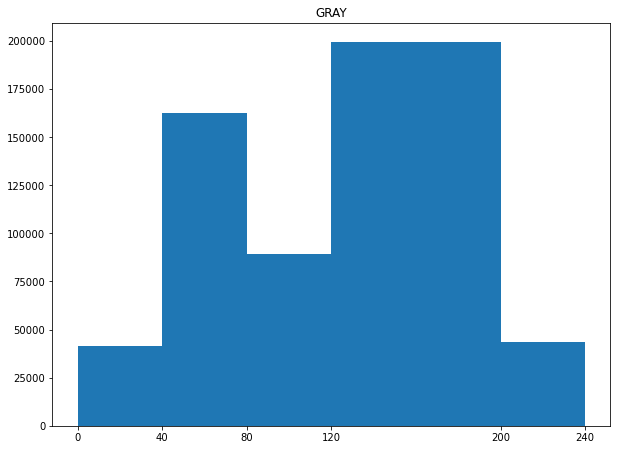

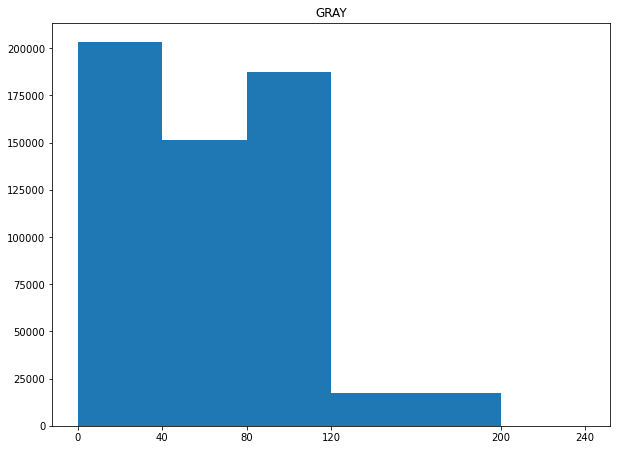

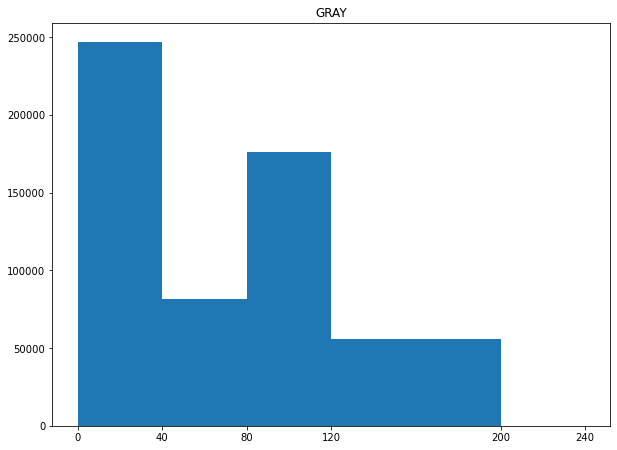

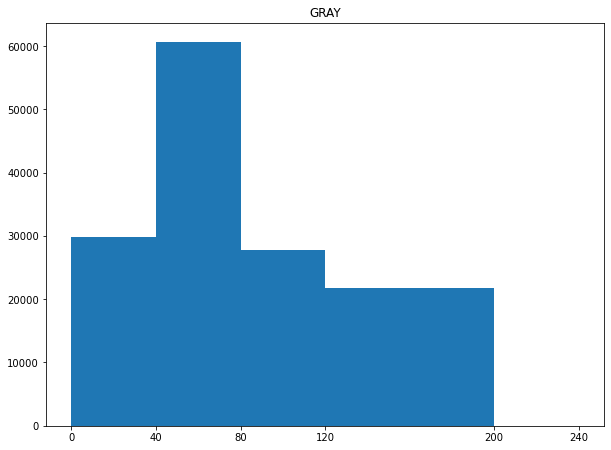

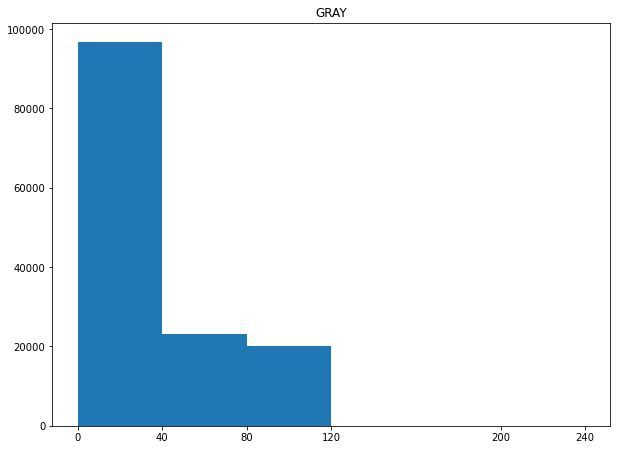

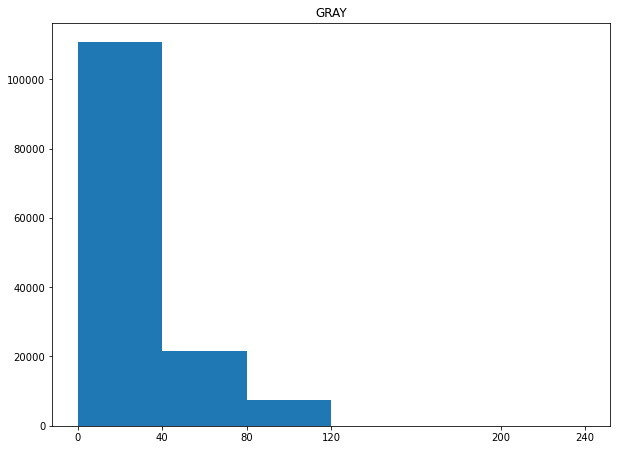

어두운 이미지


In [24]:
for idx, d in enumerate(img_namess):
    try :
        if idx > 15 :
            break
        
        print(idx, d)
        im = cv2.imread(d, cv2.IMREAD_COLOR)
        if im is None : raise Exception('image not found')

        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        plt.show()
        area_list = devide_area(im)
        BrightnessDivision(area_list)
    except Exception as e :
        print(e)